# Hypotheses:
1. ${H_0}:\mu_{EV/Hybrid} = \mu_{Petrol} \quad {H_a}:\mu_{EV/Hybrid} > \mu_{Petrol} \quad$ *Let $\mu$ be the average price in USD
2. ${H_0}:\mu_{Imported} = \mu_{Domestic} \quad {H_a}:\mu_{Imported} > \mu_{Domestic}  \quad$ *Let $\mu$ be the average price in USD
3. ${H_0}:\mu_{EV/Hybrid} = \mu_{Petrol} \quad {H_a}:\mu_{EV/Hybrid} < \mu_{Petrol} \quad$ *Let $\mu$ be the average horse power
4. ${H_0}:\mu_{EV/Hybrid} = \mu_{Petrol} \quad {H_a}:\mu_{EV/Hybrid} > \mu_{Petrol} \quad$ *Let $\mu$ be the average torque
5. ${H_0}:\mu_{V8} = \mu_{V6} \quad {H_a}:\mu_{V8} \neq \mu_{V6}  \quad$ *Let $\mu$ be the average price in USD
6. ${H_0}:\mu_{V8} = \mu_{V6} \quad {H_a}:\mu_{V8} > \mu_{V6}  \quad$ *Let $\mu$ be the average price in USD
7. ${H_0}:\hat{p}_{EV/Hybrid} = \hat{p}_{Petrol} \quad {H_a}:\hat{p}_{EV/Hybrid} \ne \hat{p}_{Petrol} \quad$ *Let $\hat{p}_{EV/Hybrid}$ be the proportion of high-performance EV's and $\hat{p}_{EV/Hybrid}$ be the proportion of high-performance Petrol vehicles
8. ${H_0}:\hat{p}_{V8} = \hat{p}_{V6} \quad {H_a}:\hat{p}_{V8} > \hat{p}_{V6} \quad$ *Let $\hat{p}_{V8}$ be the proportion of expensive V8's and $\hat{p}_{V6}$ be the proportion of expensive V6's, i.e: ≥$50k 

# Importing Libraries:

In [396]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats

# Loading Data Set:

In [4]:
df = pd.read_csv('Cars Datasets 2025.csv', encoding='latin-1')
df 

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


In [356]:
df['Fuel Types'].value_counts()

Fuel Types
Petrol                     871
Diesel                     106
Electric                    97
Hybrid                      79
Petrol/Diesel               16
Petrol/Hybrid               16
Plug-in Hybrid               5
Hybrid (Petrol)              4
Diesel/Petrol                4
Petrol, Diesel               3
Hydrogen                     3
Petrol, Hybrid               2
Petrol/AWD                   2
plug in hyrbrid              1
Hybrid/Electric              1
Petrol/EV                    1
CNG/Petrol                   1
Hybrid/Petrol                1
Diesel Hybrid                1
Petrol (Hybrid)              1
Hybrid (Gas + Electric)      1
Gas / Hybrid                 1
Hybrid / Plug-in             1
Name: count, dtype: int64

In [16]:
df['Company Names'].value_counts()

Company Names
Nissan               149
Volkswagen           109
Porsche               96
Mazda                 87
Mitsubishi            60
GMC                   59
Chevrolet             58
Peugeot               54
Kia                   54
Ford                  54
TOYOTA                45
BMW                   41
Jaguar Land Rover     40
Tata Motors           29
ROLLS ROYCE           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               23
MERCEDES              21
AUDI                  21
Cadillac              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Tesla                 10
NISSAN                10
Bugatti               10
FERRARI                9
Volvo                  9
HONDA                  7
Toyota                 5
MARUTI SUZUKI          3
VOLVO                  3
MAHINDRA               3
KIA                    1
BENTLEY                1
ROLLS ROYCE            1
Name: count, dtype: int64

In [357]:
df['Engines'].value_counts()

Engines
I4                                    64
V12                                   51
V6                                    39
Inline-4                              38
V8                                    34
                                      ..
1.5L,HYBRID                            1
2.4L Turbo I4 (i-FORCE MAX Hybrid)     1
2.0L Gas / 2.0L Hybrid                 1
1.8L / 2.0L Hybrid                     1
2.5L Hybrid / Plug-in Hybrid           1
Name: count, Length: 356, dtype: int64

# Exploratory Data Analysis:
## EV/Hybrid: 

In [260]:
df_EV_Hybrid = df[df['Fuel Types'].isin(['Electric','Hybrid','Petrol/Hybrid','Plug-in Hybrid',
                                         'Hybrid (Petrol)','Petrol, Hybrid','plug in hyrbrid',
                                         'Hybrid/Electric' ,'Petrol/EV','Hybrid/Petrol','Diesel Hybrid',
                                         'Petrol (Hybrid)','Hybrid (Gas + Electric)','Gas / Hybrid',
                                         'Hybrid / Plug-in'])].copy()

df_EV_Hybrid_price = df_EV_Hybrid[['Company Names', 'Cars Names', 'Cars Prices']].copy()

df_EV_Hybrid_price

,Company Names,Cars Names,Cars Prices
0,FERRARI,SF90 STRADALE,"$1,100,000"
32,ASTON MARTIN,VALKYRIE,"$3,200,000"
33,ASTON MARTIN,VALHALLA,"$1,100,000"
42,LAMBORGHINI,SIAN,"$2,800,000"
97,MERCEDES,BENZ EQS 53,"$102,000"
...,...,...,...
1213,Toyota,Crown Signia,"$43,590  $48,000"
1214,Toyota,4Runner (6th Gen),"$50,000"
1215,Toyota,Corolla Cross,"$25,210  $29,135"
1216,Toyota,C-HR+," 33,000"


### Average Price for EV/Hybrid vehicles:

In [261]:
df_EV_Hybrid_price['Average Car (EV/Hybrid) Price'] = df_EV_Hybrid_price['Cars Prices'].apply(clean_string_data)

df_EV_Hybrid_price


,Company Names,Cars Names,Cars Prices,Average Car (EV/Hybrid) Price
0,FERRARI,SF90 STRADALE,"$1,100,000",1100000.0
32,ASTON MARTIN,VALKYRIE,"$3,200,000",3200000.0
33,ASTON MARTIN,VALHALLA,"$1,100,000",1100000.0
42,LAMBORGHINI,SIAN,"$2,800,000",2800000.0
97,MERCEDES,BENZ EQS 53,"$102,000",102000.0
...,...,...,...,...
1213,Toyota,Crown Signia,"$43,590  $48,000",45795.0
1214,Toyota,4Runner (6th Gen),"$50,000",50000.0
1215,Toyota,Corolla Cross,"$25,210  $29,135",27172.5
1216,Toyota,C-HR+," 33,000",38610.0


In [136]:
df_EV_Hybrid_price.isnull().sum()

Company Names                    0
Cars Names                       0
Cars Prices                      0
Average Car (EV/Hybrid) Price    1
dtype: int64

### Distribution of Average Car Prices for EV/Hybrid vehicles:

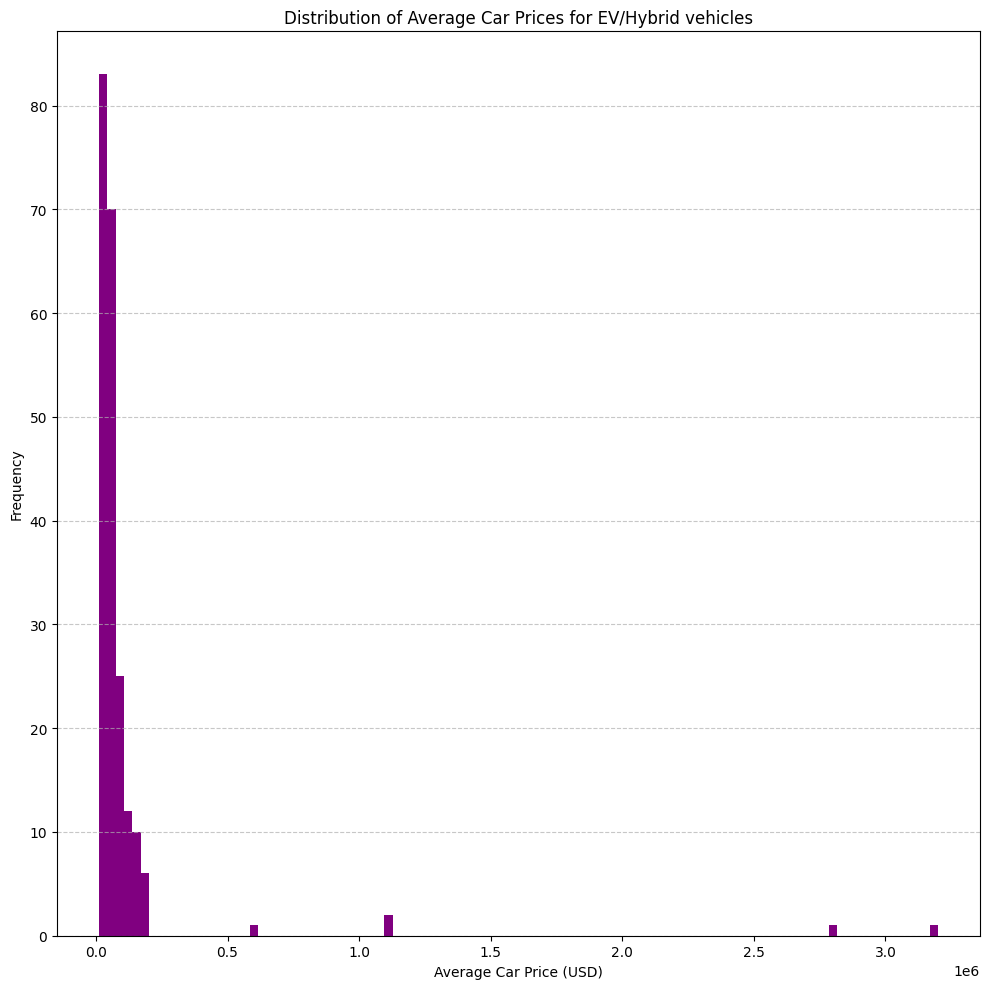

In [228]:
plt.figure(figsize=(10,10))
plt.hist(df_EV_Hybrid_price['Average Car (EV/Hybrid) Price'].dropna(), color = 'purple', bins = 100)
plt.title('Distribution of Average Car Prices for EV/Hybrid vehicles')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Price for EV/Hybrid vehicles:

In [153]:
df_EV_Hybrid_price.describe()

,Average Car (EV/Hybrid) Price
count,2.110000e+02
mean,1.020227e+05
std,3.070192e+05
min,1.100000e+04
25%,3.500000e+04
50%,4.800000e+04
75%,8.500000e+04
max,3.200000e+06


#### Note: •As we can see from the distribution of the average car prices for EV/Hybrids, there are many outliers in the more expensive side of the graph. From here I will restrict the previous data frame to show us only the EV/Hybrids that are below $200,000.

### Average Price for EV/Hybrid Vehicles ≤$200,000:

In [178]:
price_threshold = 200000

df_EV_Hybrid_price_filter = df_EV_Hybrid_price[df_EV_Hybrid_price['Average Car (EV/Hybrid) Price'] <= price_threshold
].copy()

df_EV_Hybrid_price_filter

,Company Names,Cars Names,Cars Prices,Average Car (EV/Hybrid) Price
97,MERCEDES,BENZ EQS 53,"$102,000",102000.0
139,AUDI,E-TRON,"$75,000",75000.0
140,AUDI,E-TRON SPORTBACK,"$78,000",78000.0
142,BMW,I8 ROADSTER,"$165,000",165000.0
183,KIA,SPORTAGE PHEV,"$41,000",41000.0
...,...,...,...,...
1213,Toyota,Crown Signia,"$43,590  $48,000",45795.0
1214,Toyota,4Runner (6th Gen),"$50,000",50000.0
1215,Toyota,Corolla Cross,"$25,210  $29,135",27172.5
1216,Toyota,C-HR+," 33,000",38610.0


In [179]:
df_EV_Hybrid_price_filter.isnull().sum()

Company Names                    0
Cars Names                       0
Cars Prices                      0
Average Car (EV/Hybrid) Price    0
dtype: int64

### Distribution of Average Car Prices for EV/Hybrid Vehicles $\le$ $200,000:

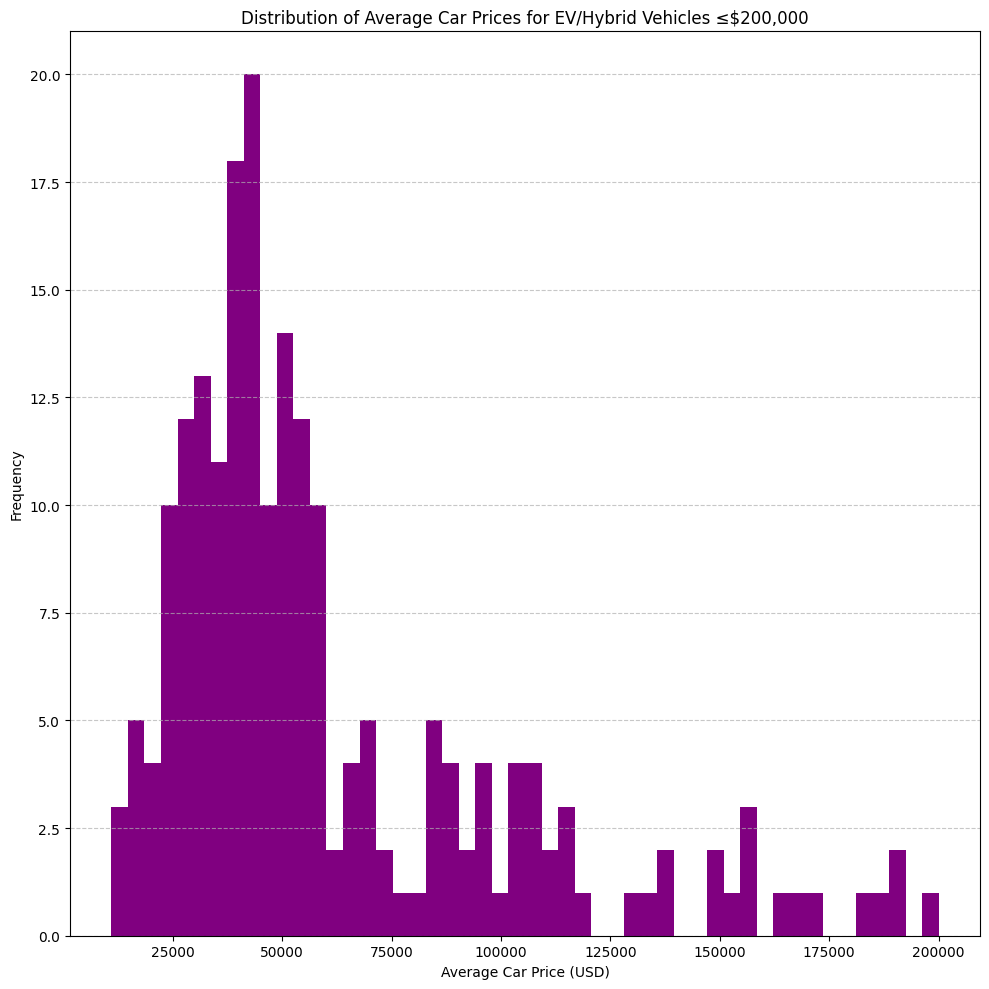

In [183]:
plt.figure(figsize=(10,10))
plt.hist(df_EV_Hybrid_price_filter['Average Car (EV/Hybrid) Price'].dropna(), color = 'purple', bins = 50)
plt.title('Distribution of Average Car Prices for EV/Hybrid Vehicles ≤$200,000')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average price for EV/Hybrid vehicles ≤$200,000:

In [283]:
df_EV_Hybrid_price_filter.describe()

,Average Car (EV/Hybrid) Price
count,205.000000
mean,61105.353659
std,39942.868250
min,11000.000000
25%,35000.000000
50%,47000.000000
75%,75000.000000
max,200000.000000


### EV/Hybrid Torque:

In [296]:
df_EV_Hybrid_T = df_EV_Hybrid[['Company Names', 'Cars Names', 'Torque']].copy()
df_EV_Hybrid_T

,Company Names,Cars Names,Torque
0,FERRARI,SF90 STRADALE,800 Nm
32,ASTON MARTIN,VALKYRIE,900 Nm
33,ASTON MARTIN,VALHALLA,1000 Nm
42,LAMBORGHINI,SIAN,720 Nm
97,MERCEDES,BENZ EQS 53,950 Nm
...,...,...,...
1213,Toyota,Crown Signia,239 Nm
1214,Toyota,4Runner (6th Gen),630 Nm
1215,Toyota,Corolla Cross,190  210 Nm
1216,Toyota,C-HR+,190  205 Nm


### Average EV/Hybrid Torque:

In [301]:
df_EV_Hybrid_T['Average EV/Hybrid Torque'] = df_EV_Hybrid_T['Torque'].apply(clean_string_data_2)

df_EV_Hybrid_T

,Company Names,Cars Names,Torque,Average EV/Hybrid Torque
0,FERRARI,SF90 STRADALE,800 Nm,800.0
32,ASTON MARTIN,VALKYRIE,900 Nm,900.0
33,ASTON MARTIN,VALHALLA,1000 Nm,1000.0
42,LAMBORGHINI,SIAN,720 Nm,720.0
97,MERCEDES,BENZ EQS 53,950 Nm,950.0
...,...,...,...,...
1213,Toyota,Crown Signia,239 Nm,239.0
1214,Toyota,4Runner (6th Gen),630 Nm,630.0
1215,Toyota,Corolla Cross,190  210 Nm,200.0
1216,Toyota,C-HR+,190  205 Nm,197.5


### Distribution of Average Torque:

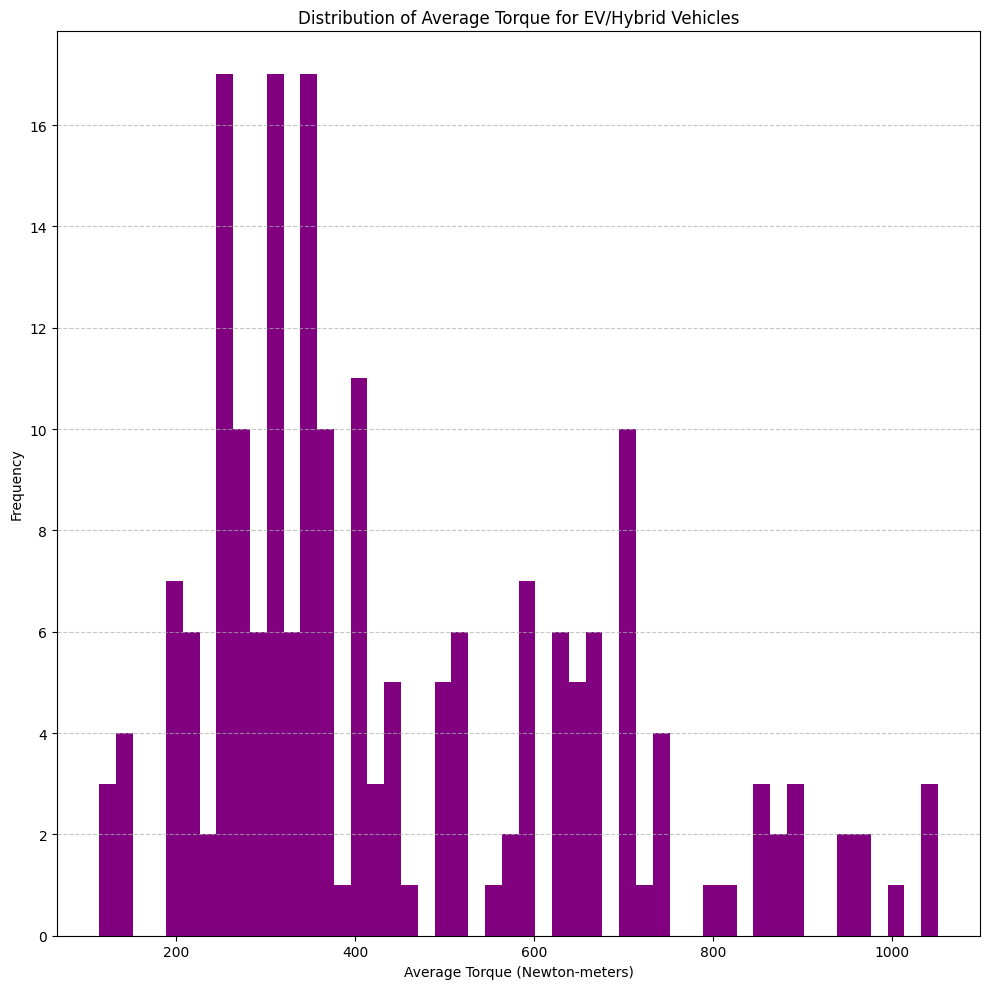

In [303]:
plt.figure(figsize=(10,10))
plt.hist(df_EV_Hybrid_T['Average EV/Hybrid Torque'].dropna(), color = 'purple', bins = 50)
plt.title('Distribution of Average Torque for EV/Hybrid Vehicles')
plt.xlabel('Average Torque (Newton-meters)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Torque for EV/Hybrid:

In [295]:
df_EV_Hybrid_T.describe()

,Average Torque
count,197.000000
mean,447.934010
std,219.666452
min,114.000000
25%,290.000000
50%,360.000000
75%,620.000000
max,1051.000000


## Petroleum:

In [140]:
df_petr = df[df['Fuel Types'].isin(['Petrol','Petrol, Diesel','Petrol/AWD','CNG/Petrol'])].copy()

df_petr_price = df_petr[['Company Names', 'Cars Names', 'Cars Prices']].copy()

df_petr_price

,Company Names,Cars Names,Cars Prices
1,ROLLS ROYCE,PHANTOM,"$460,000"
2,Ford,KA+,"$12,000-$15,000"
3,MERCEDES,GT 63 S,"$161,000"
4,AUDI,AUDI R8 Gt,"$253,290"
5,BMW,Mclaren 720s,"$499,000"
...,...,...,...
1208,Mazda,Bongo Truck,"$15,000 - $18,000"
1209,Mazda,Rotary Pickup,"$18,000 - $22,000"
1210,Mazda,Luce Rotary Coupe,"$25,000 - $30,000"
1211,Mazda,Millenia S,"$30,000 - $35,000"


### Average Price for Petroleum vehicles:

In [144]:
df_petr_price['Average Car (Petr) Price'] = df_petr_price['Cars Prices'].apply(clean_string_data)

df_petr_price

,Company Names,Cars Names,Cars Prices,Average Car (Petr) Price
1,ROLLS ROYCE,PHANTOM,"$460,000",460000.0
2,Ford,KA+,"$12,000-$15,000",13500.0
3,MERCEDES,GT 63 S,"$161,000",161000.0
4,AUDI,AUDI R8 Gt,"$253,290",253290.0
5,BMW,Mclaren 720s,"$499,000",499000.0
...,...,...,...,...
1208,Mazda,Bongo Truck,"$15,000 - $18,000",16500.0
1209,Mazda,Rotary Pickup,"$18,000 - $22,000",20000.0
1210,Mazda,Luce Rotary Coupe,"$25,000 - $30,000",27500.0
1211,Mazda,Millenia S,"$30,000 - $35,000",32500.0


In [141]:
df_petr_price.isnull().sum()

Company Names    0
Cars Names       0
Cars Prices      0
dtype: int64

### Distribution of Average Car Prices for Petroleum vehicles:

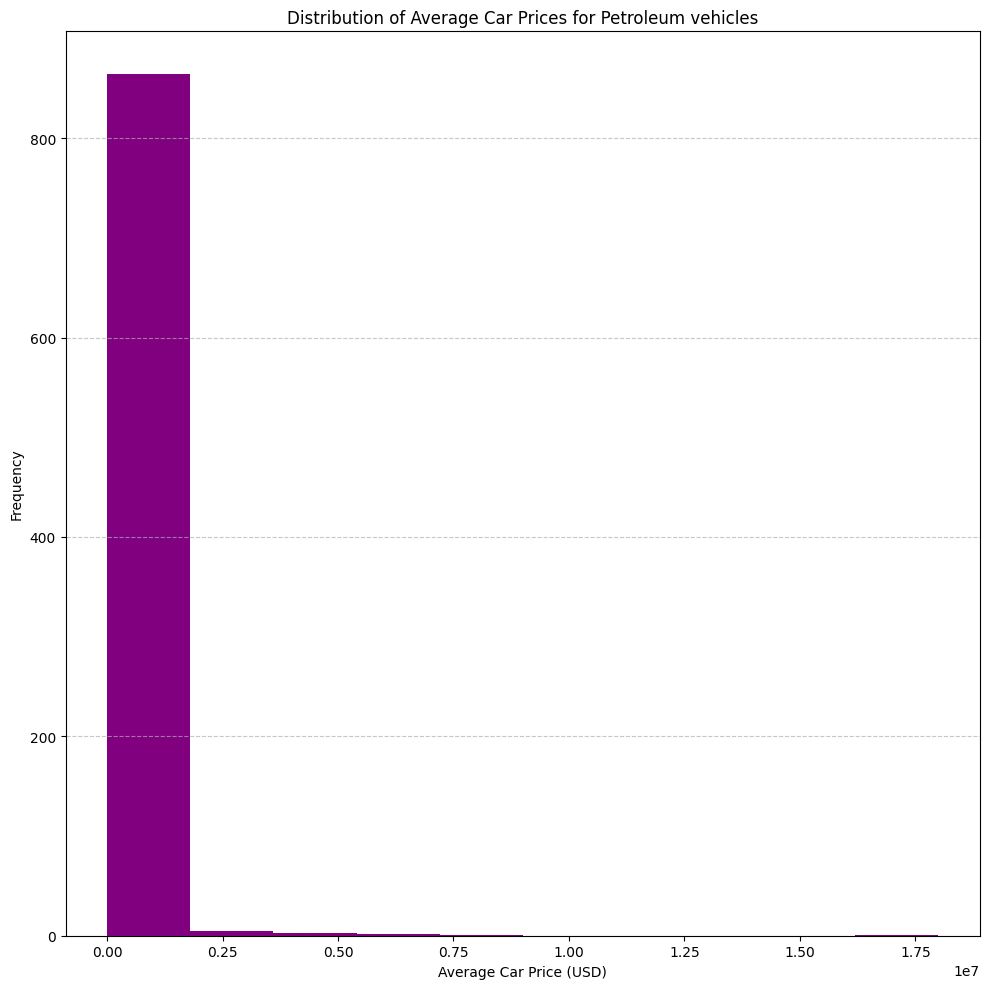

In [149]:
plt.figure(figsize=(10,10))
plt.hist(df_petr_price['Average Car (Petr) Price'].dropna(), color = 'purple')
plt.title('Distribution of Average Car Prices for Petroleum vehicles')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Price for Petroleum Vehicles:

In [150]:
df_petr_price.describe()

,Average Car (Petr) Price
count,8.760000e+02
mean,1.610048e+05
std,8.232109e+05
min,4.000000e+03
25%,2.700000e+04
50%,4.200000e+04
75%,7.500000e+04
max,1.800000e+07


#### Note: •We have alot more of a skewed distribution of the average prices of petroleum vehicles. We will filter the outliers by restricting our data set to show us the cars ≤$200,000

### Average Price for Petroleum Vehicles ≤$200,000

In [185]:
price_threshold = 200000

df_petr_price_filter = df_petr_price[df_petr_price['Average Car (Petr) Price'] <= price_threshold].copy()

df_petr_price_filter

,Company Names,Cars Names,Cars Prices,Average Car (Petr) Price
2,Ford,KA+,"$12,000-$15,000",13500.0
3,MERCEDES,GT 63 S,"$161,000",161000.0
6,ASTON MARTIN,VANTAGE F1,"$193,440",193440.0
17,TOYOTA,GR SUPRA,"$53,900",53900.0
18,TOYOTA,TOYOTA 86,"$27,000",27000.0
...,...,...,...,...
1206,Mazda,MX-5 Superlight Concept,"$30,000 - $35,000",32500.0
1208,Mazda,Bongo Truck,"$15,000 - $18,000",16500.0
1209,Mazda,Rotary Pickup,"$18,000 - $22,000",20000.0
1210,Mazda,Luce Rotary Coupe,"$25,000 - $30,000",27500.0


In [186]:
df_petr_price_filter.isnull().sum()

Company Names               0
Cars Names                  0
Cars Prices                 0
Average Car (Petr) Price    0
dtype: int64

### Distribution of Average Car Price for Petroleum Vehicles ≤$200,000

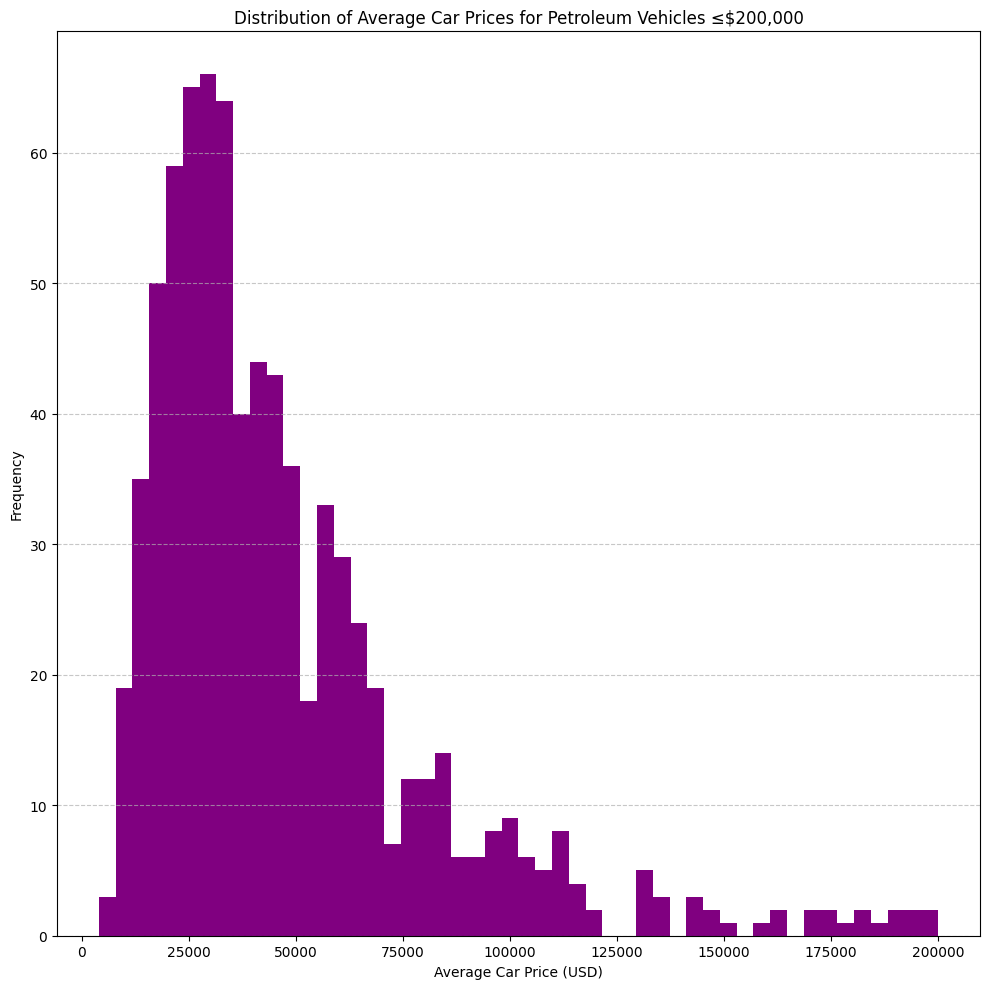

In [187]:
plt.figure(figsize=(10,10))
plt.hist(df_petr_price_filter['Average Car (Petr) Price'].dropna(), color = 'purple', bins = 50)
plt.title('Distribution of Average Car Prices for Petroleum Vehicles ≤$200,000')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Prices for Petroleum Vehicles ≤$200,000

In [188]:
df_petr_price_filter.describe()

,Average Car (Petr) Price
count,777.000000
mean,47769.857143
std,33695.876132
min,4000.000000
25%,25000.000000
50%,38000.000000
75%,60000.000000
max,200000.000000


### Petroleum Torque:

In [300]:
df_petr_T = df_petr[['Company Names', 'Cars Names', 'Torque']].copy()
df_petr_T

,Company Names,Cars Names,Torque
1,ROLLS ROYCE,PHANTOM,900 Nm
2,Ford,KA+,100 - 140 Nm
3,MERCEDES,GT 63 S,900 Nm
4,AUDI,AUDI R8 Gt,560 Nm
5,BMW,Mclaren 720s,770 Nm
...,...,...,...
1208,Mazda,Bongo Truck,150 Nm
1209,Mazda,Rotary Pickup,160 Nm
1210,Mazda,Luce Rotary Coupe,180 Nm
1211,Mazda,Millenia S,250 Nm


### Average Petroleum Torque:

In [304]:
df_petr_T['Average Petroleum Torque'] = df_petr_T['Torque'].apply(clean_string_data_2)

df_petr_T

,Company Names,Cars Names,Torque,Average Petroleum Torque
1,ROLLS ROYCE,PHANTOM,900 Nm,900.0
2,Ford,KA+,100 - 140 Nm,120.0
3,MERCEDES,GT 63 S,900 Nm,900.0
4,AUDI,AUDI R8 Gt,560 Nm,560.0
5,BMW,Mclaren 720s,770 Nm,770.0
...,...,...,...,...
1208,Mazda,Bongo Truck,150 Nm,150.0
1209,Mazda,Rotary Pickup,160 Nm,160.0
1210,Mazda,Luce Rotary Coupe,180 Nm,180.0
1211,Mazda,Millenia S,250 Nm,250.0


### Distribution of Average Torque for Petroleum Vehicles:

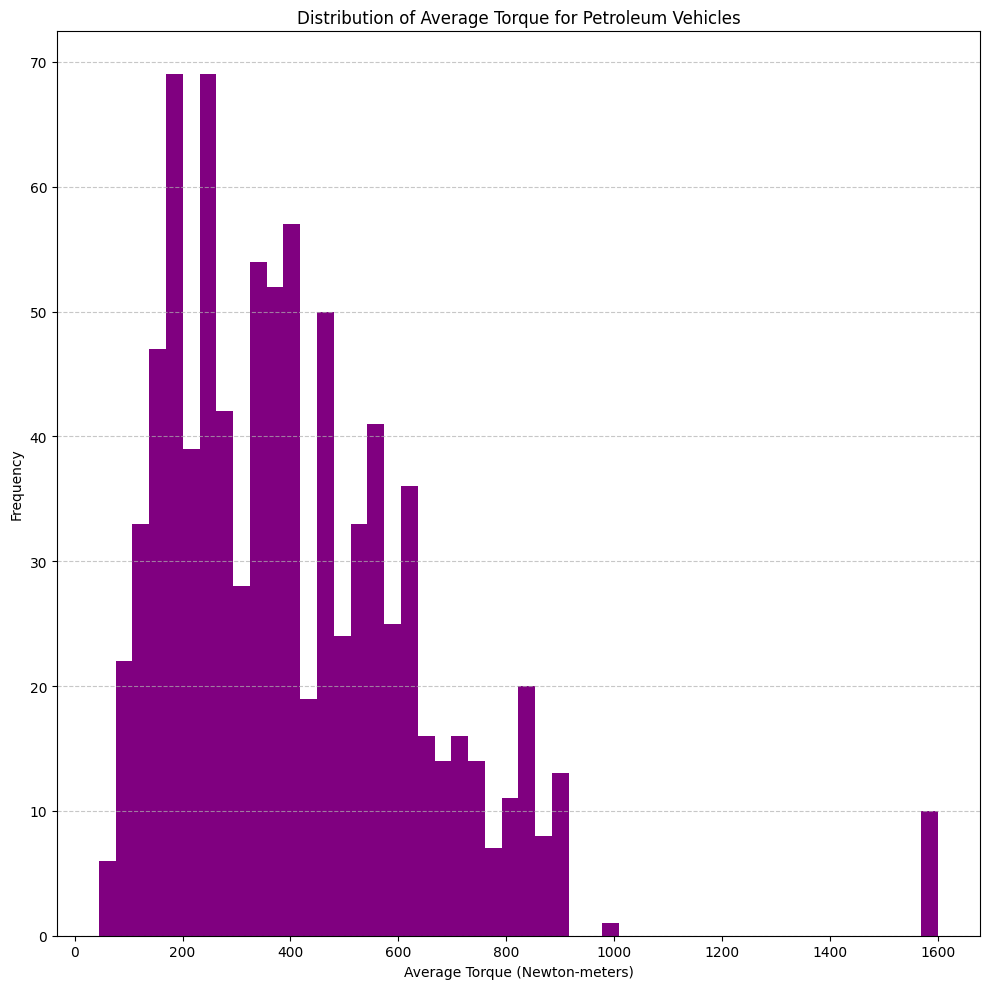

In [305]:
plt.figure(figsize=(10,10))
plt.hist(df_petr_T['Average Petroleum Torque'].dropna(), color = 'purple', bins = 50)
plt.title('Distribution of Average Torque for Petroleum Vehicles')
plt.xlabel('Average Torque (Newton-meters)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Torque for Petroleum Vehicles:

In [306]:
df_petr_T.describe()

,Average Petroleum Torque
count,876.000000
mean,413.558790
std,243.477591
min,45.000000
25%,240.000000
50%,366.000000
75%,560.000000
max,1600.000000


## EV/Hybrid V.S. Petroleum:

### Average EV/Hybrid Price V.S. Average Petroleum Price (With Outliers):

#### Boxplot:

In [252]:
data_to_plot = [df_EV_Hybrid_price['Average Car (EV/Hybrid) Price'].dropna(),
               df_petr_price['Average Car (Petr) Price'].dropna()]


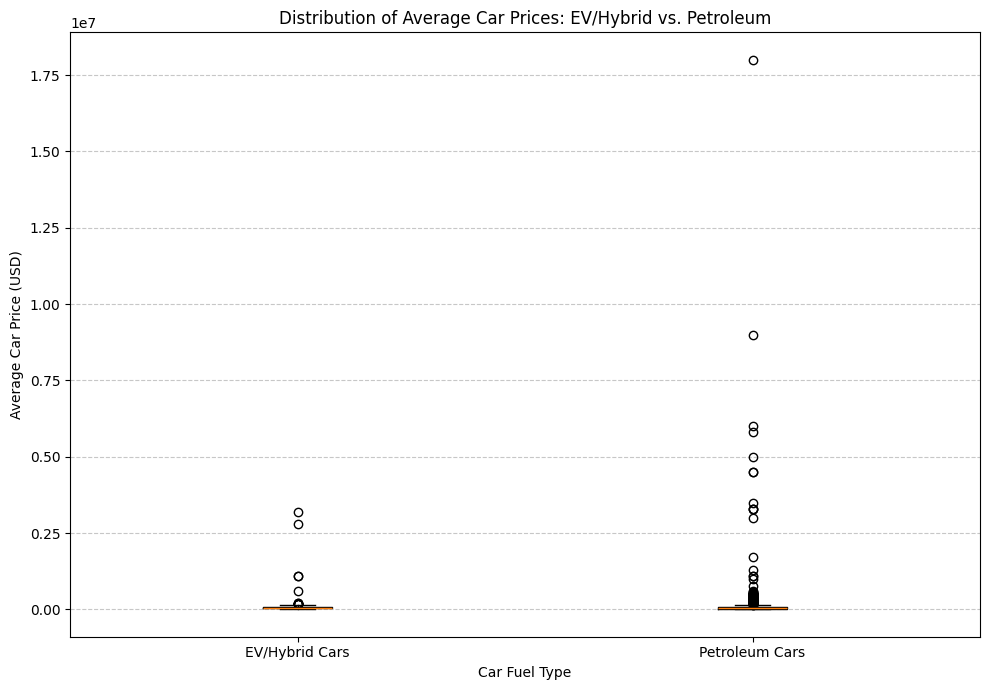

In [253]:
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot,tick_labels=['EV/Hybrid Cars','Petroleum Cars'])
plt.title('Distribution of Average Car Prices: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Violin Plot:

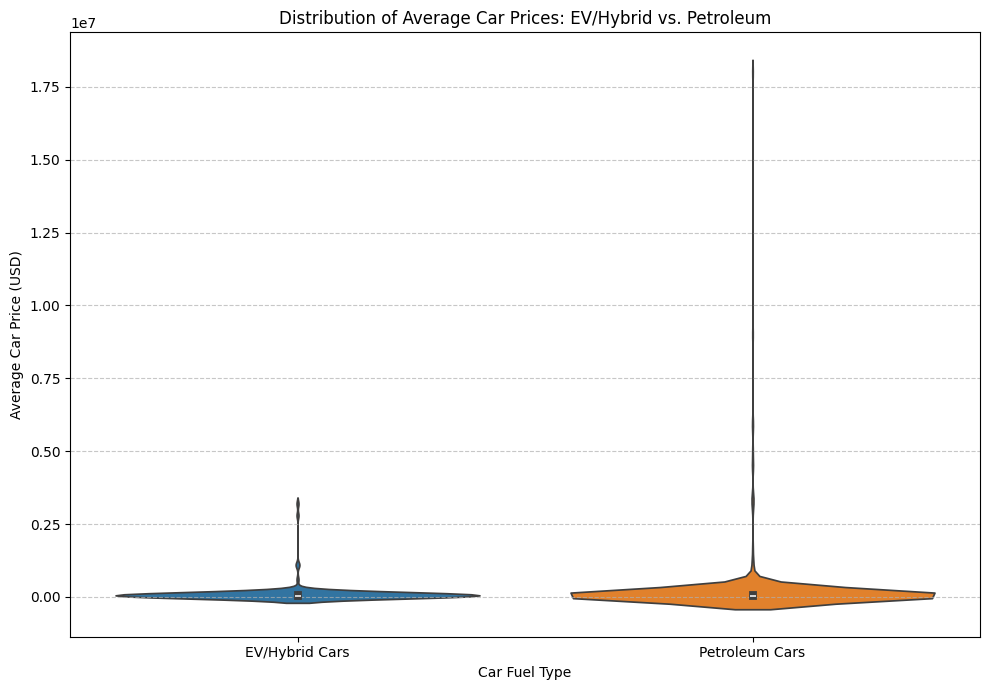

In [267]:
df_EV_Hybrid_price.dropna(subset=['Average Car (EV/Hybrid) Price'], inplace=True)
df_petr_price.dropna(subset=['Average Car (Petr) Price'], inplace=True)

df_EV_Hybrid_price['fuel_category'] = 'EV/Hybrid Cars'
df_petr_price['fuel_category'] = 'Petroleum Cars'

df_EV_Hybrid_for_plot = df_EV_Hybrid_price[['fuel_category', 'Average Car (EV/Hybrid) Price']].rename(columns={'Average Car (EV/Hybrid) Price': 'Average Car Price'})
df_petr_for_plot = df_petr_price[['fuel_category', 'Average Car (Petr) Price']].rename(columns={'Average Car (Petr) Price': 'Average Car Price'})

data_to_plot_violin = pd.concat([df_EV_Hybrid_for_plot, df_petr_for_plot])

plt.figure(figsize=(10, 7))
sns.violinplot(x='fuel_category', y='Average Car Price', data=data_to_plot_violin, hue = 'fuel_category', legend = False)

plt.title('Distribution of Average Car Prices: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Barchart Plot:

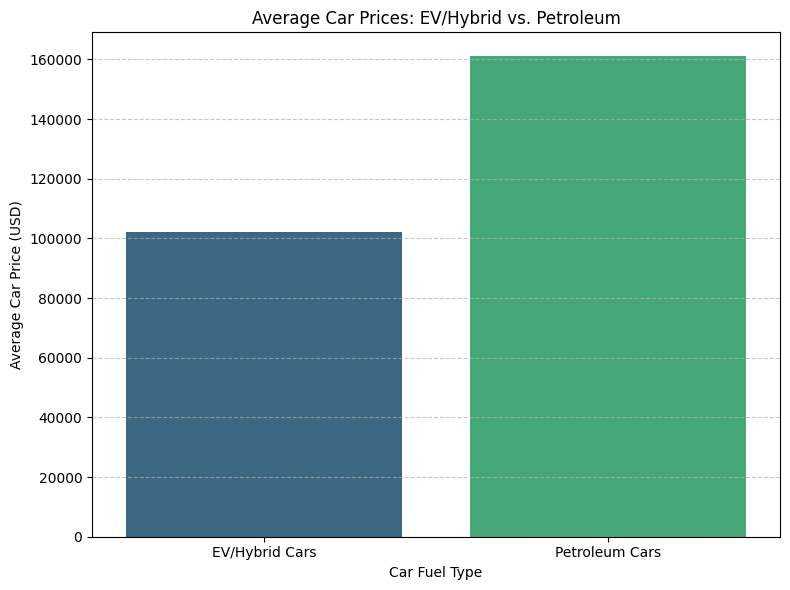

In [279]:
df_EV_Hybrid_price.dropna(subset=['Average Car (EV/Hybrid) Price'], inplace=True)
df_petr_price.dropna(subset=['Average Car (Petr) Price'], inplace=True)

df_EV_Hybrid_price['fuel_category'] = 'EV/Hybrid Cars'
df_petr_price['fuel_category'] = 'Petroleum Cars'

df_EV_Hybrid_for_plot = df_EV_Hybrid_price[['fuel_category', 'Average Car (EV/Hybrid) Price']].rename(columns={'Average Car (EV/Hybrid) Price': 'Average Car Price'})
df_petr_for_plot = df_petr_price[['fuel_category', 'Average Car (Petr) Price']].rename(columns={'Average Car (Petr) Price': 'Average Car Price'})

data_to_plot_bar = pd.concat([df_EV_Hybrid_for_plot, df_petr_for_plot])

average_prices = data_to_plot_bar.groupby('fuel_category')['Average Car Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='fuel_category', y='Average Car Price', data=average_prices, hue='fuel_category', palette = 'viridis')

plt.title('Average Car Prices: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Average EV/Hybrid Price V.S. Average Petroleum Vehicles (Without Outliers):

#### Boxplot:

In [358]:
data_to_plot_filtered = [df_EV_Hybrid_price_filter['Average Car (EV/Hybrid) Price'].dropna(),
               df_petr_price_filter['Average Car (Petr) Price'].dropna()]


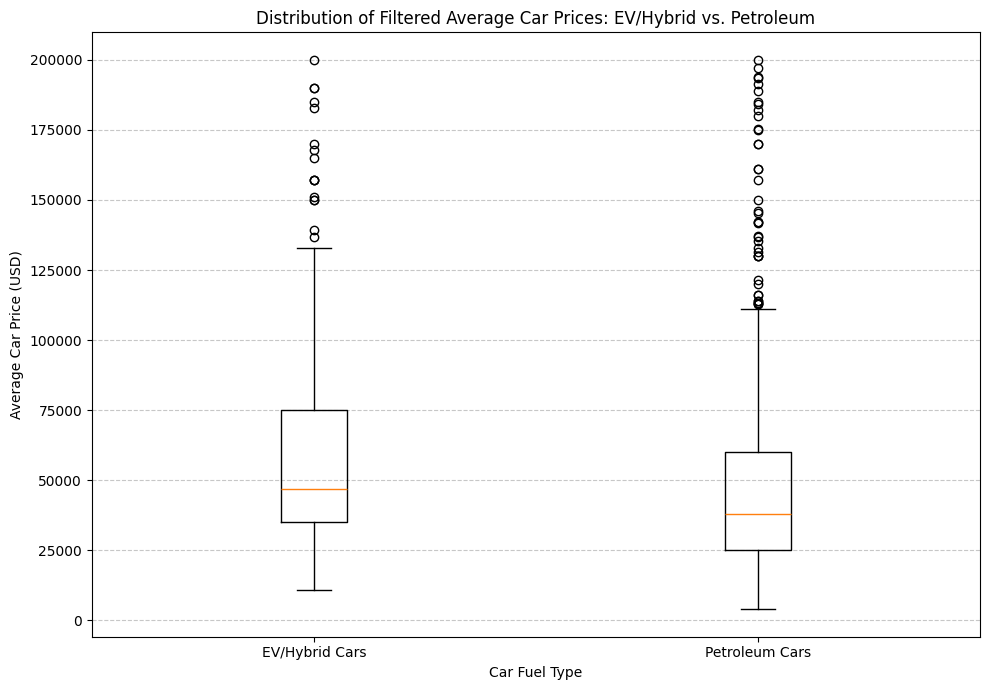

In [360]:
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot_filtered,tick_labels=['EV/Hybrid Cars','Petroleum Cars'])

plt.title('Distribution of Filtered Average Car Prices: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

#### Violin Plot:

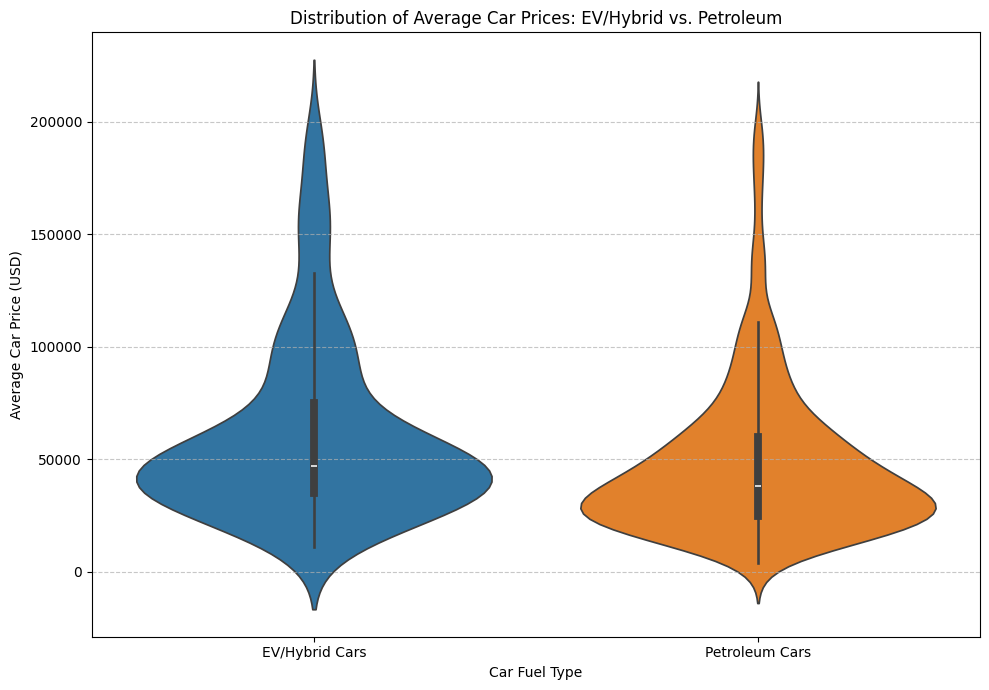

In [281]:
df_EV_Hybrid_price_filter.dropna(subset=['Average Car (EV/Hybrid) Price'], inplace=True)
df_petr_price_filter.dropna(subset=['Average Car (Petr) Price'], inplace=True)

df_EV_Hybrid_price_filter['fuel_category'] = 'EV/Hybrid Cars'
df_petr_price_filter['fuel_category'] = 'Petroleum Cars'

df_EV_Hybrid_for_plot = df_EV_Hybrid_price_filter[['fuel_category', 'Average Car (EV/Hybrid) Price']].rename(columns={'Average Car (EV/Hybrid) Price': 'Average Car Price'})
df_petr_for_plot = df_petr_price_filter[['fuel_category', 'Average Car (Petr) Price']].rename(columns={'Average Car (Petr) Price': 'Average Car Price'})

data_to_plot_violin = pd.concat([df_EV_Hybrid_for_plot, df_petr_for_plot])

plt.figure(figsize=(10, 7))
sns.violinplot(x='fuel_category', y='Average Car Price', data=data_to_plot_violin, hue = 'fuel_category', legend = False)

plt.title('Distribution of Average Car Prices: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Barchart Plot:

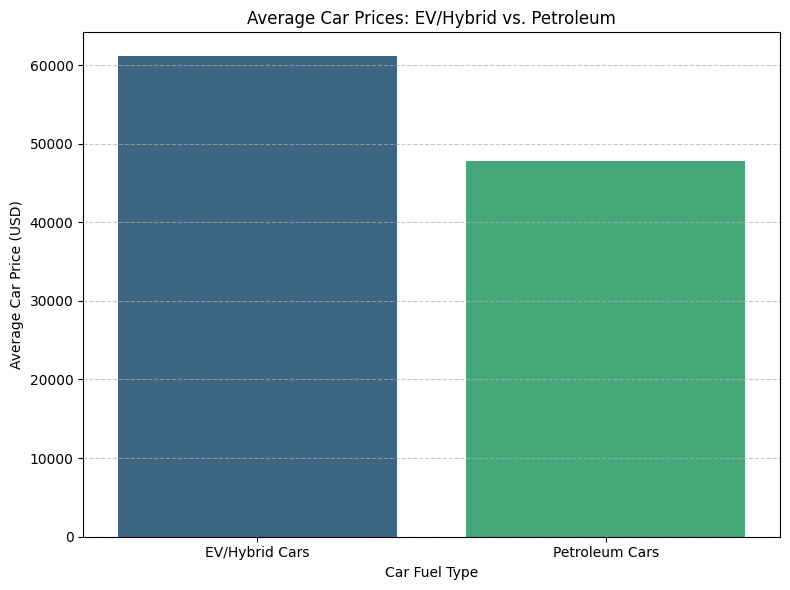

In [282]:
df_EV_Hybrid_price_filter.dropna(subset=['Average Car (EV/Hybrid) Price'], inplace=True)
df_petr_price_filter.dropna(subset=['Average Car (Petr) Price'], inplace=True)

df_EV_Hybrid_price_filter['fuel_category'] = 'EV/Hybrid Cars'
df_petr_price_filter['fuel_category'] = 'Petroleum Cars'

df_EV_Hybrid_for_plot = df_EV_Hybrid_price_filter[['fuel_category', 'Average Car (EV/Hybrid) Price']].rename(columns={'Average Car (EV/Hybrid) Price': 'Average Car Price'})
df_petr_for_plot = df_petr_price_filter[['fuel_category', 'Average Car (Petr) Price']].rename(columns={'Average Car (Petr) Price': 'Average Car Price'})

data_to_plot_bar = pd.concat([df_EV_Hybrid_for_plot, df_petr_for_plot])

average_prices = data_to_plot_bar.groupby('fuel_category')['Average Car Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='fuel_category', y='Average Car Price', data=average_prices, hue='fuel_category', palette = 'viridis')

plt.title('Average Car Prices: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### EV/Hybrid Torque V.S. Petroleum Torque:

#### Boxplot:

In [361]:
data_to_plot_T = [df_EV_Hybrid_T['Average EV/Hybrid Torque'].dropna(),
               df_petr_T['Average Petroleum Torque'].dropna()]


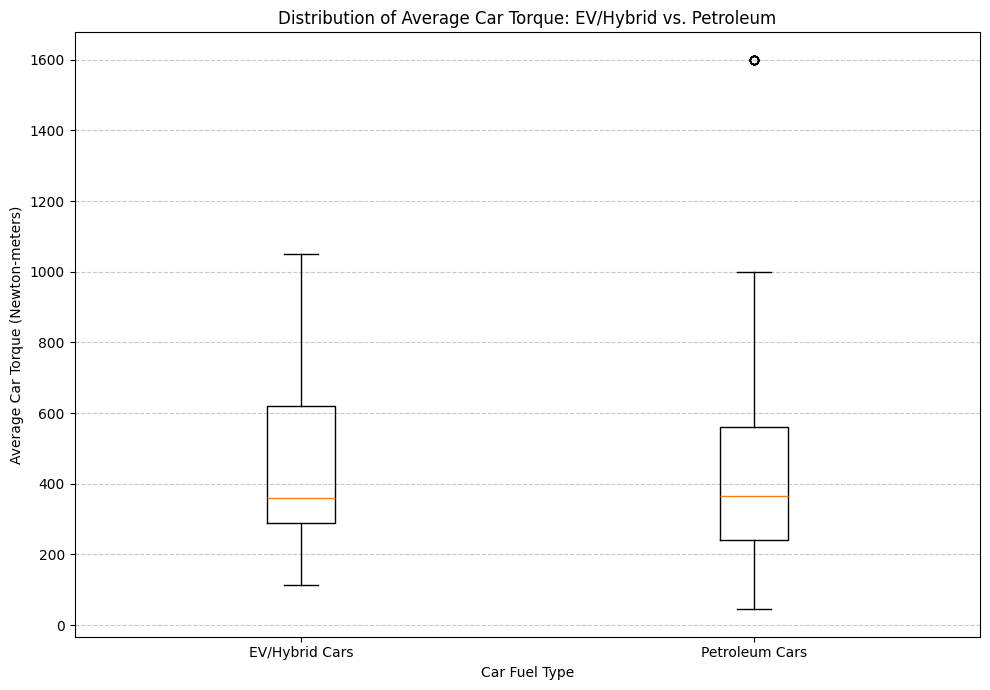

In [363]:
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot_T,tick_labels=['EV/Hybrid Cars','Petroleum Cars'])

plt.title('Distribution of Average Car Torque: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Torque (Newton-meters)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Violin Plot:

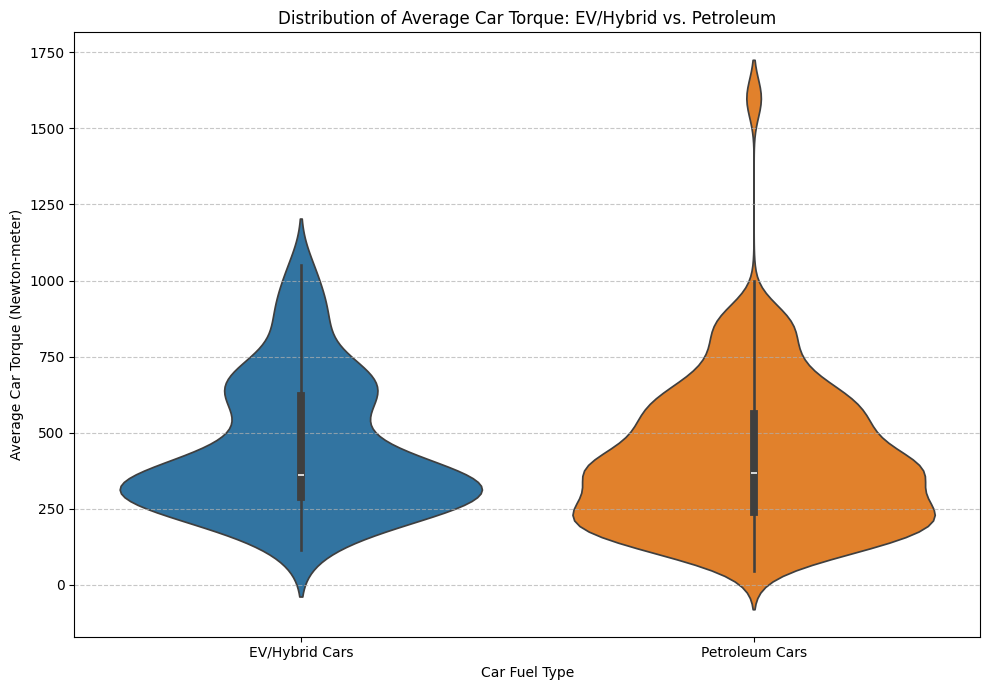

In [364]:
df_EV_Hybrid_T.dropna(subset=['Average EV/Hybrid Torque'], inplace=True)
df_petr_T.dropna(subset=['Average Petroleum Torque'], inplace=True)

df_EV_Hybrid_T['fuel_category'] = 'EV/Hybrid Cars'
df_petr_T['fuel_category'] = 'Petroleum Cars'

df_EV_Hybrid_for_plot = df_EV_Hybrid_T[['fuel_category', 'Average EV/Hybrid Torque']].rename(columns={'Average EV/Hybrid Torque': 'Average Car Torque'})
df_petr_for_plot = df_petr_T[['fuel_category', 'Average Petroleum Torque']].rename(columns={'Average Petroleum Torque': 'Average Car Torque'})

data_to_plot_violin = pd.concat([df_EV_Hybrid_for_plot, df_petr_for_plot])

plt.figure(figsize=(10, 7))
sns.violinplot(x='fuel_category', y='Average Car Torque', data=data_to_plot_violin, hue = 'fuel_category', legend = False)

plt.title('Distribution of Average Car Torque: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Torque (Newton-meter)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Barchart Plot:

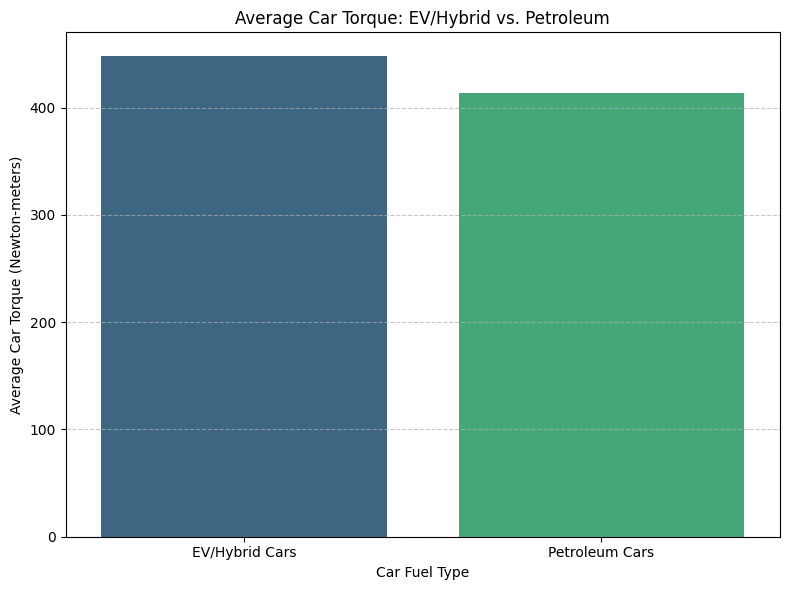

In [366]:
df_EV_Hybrid_T.dropna(subset=['Average EV/Hybrid Torque'], inplace=True)
df_petr_T.dropna(subset=['Average Petroleum Torque'], inplace=True)

df_EV_Hybrid_T['fuel_category'] = 'EV/Hybrid Cars'
df_petr_T['fuel_category'] = 'Petroleum Cars'

df_EV_Hybrid_for_plot = df_EV_Hybrid_T[['fuel_category', 'Average EV/Hybrid Torque']].rename(columns={'Average EV/Hybrid Torque': 'Average Car Torque'})
df_petr_for_plot = df_petr_T[['fuel_category', 'Average Petroleum Torque']].rename(columns={'Average Petroleum Torque': 'Average Car Torque'})

data_to_plot_bar = pd.concat([df_EV_Hybrid_for_plot, df_petr_for_plot])

average_prices = data_to_plot_bar.groupby('fuel_category')['Average Car Torque'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='fuel_category', y='Average Car Torque', data=average_prices, hue='fuel_category', palette = 'viridis')

plt.title('Average Car Torque: EV/Hybrid vs. Petroleum')
plt.xlabel('Car Fuel Type')
plt.ylabel('Average Car Torque (Newton-meters)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Domestic:

In [85]:
df_domestic = df[df['Company Names'].isin(['Ford','Chevorlet','GMC','Tesla','Jeep','Cadillac'])].copy()

df_domestic_price = df_domestic[['Company Names', 'Cars Names', 'Cars Prices']].copy()

df_domestic_price

,Company Names,Cars Names,Cars Prices
2,Ford,KA+,"$12,000-$15,000"
599,Cadillac,CT4,"$34,395"
600,Cadillac,CT4-V,"$46,595"
601,Cadillac,CT5,"$38,195"
602,Cadillac,CT5-V,"$50,995"
...,...,...,...
1062,Ford,Mustang (2024),"$60,000"
1063,Ford,Ranger (2024),"$40,000"
1064,Ford,Escape Plug-in Hybrid (2024),"$38,000"
1065,Ford,Bronco (2024),"$45,000"


### Average Price for Domestic Vehicles:

In [86]:
df_domestic_price['Average Car (DOM) Price'] = df_domestic_price['Cars Prices'].apply(clean_string_data)

df_domestic_price


,Company Names,Cars Names,Cars Prices,Average Car (DOM) Price
2,Ford,KA+,"$12,000-$15,000",13500.0
599,Cadillac,CT4,"$34,395",34395.0
600,Cadillac,CT4-V,"$46,595",46595.0
601,Cadillac,CT5,"$38,195",38195.0
602,Cadillac,CT5-V,"$50,995",50995.0
...,...,...,...,...
1062,Ford,Mustang (2024),"$60,000",60000.0
1063,Ford,Ranger (2024),"$40,000",40000.0
1064,Ford,Escape Plug-in Hybrid (2024),"$38,000",38000.0
1065,Ford,Bronco (2024),"$45,000",45000.0


In [151]:
df_domestic_price.isnull().sum()

Company Names              0
Cars Names                 0
Cars Prices                0
Average Car (DOM) Price    0
dtype: int64

### Distribution of Average Car Prices for Domestic Brands:

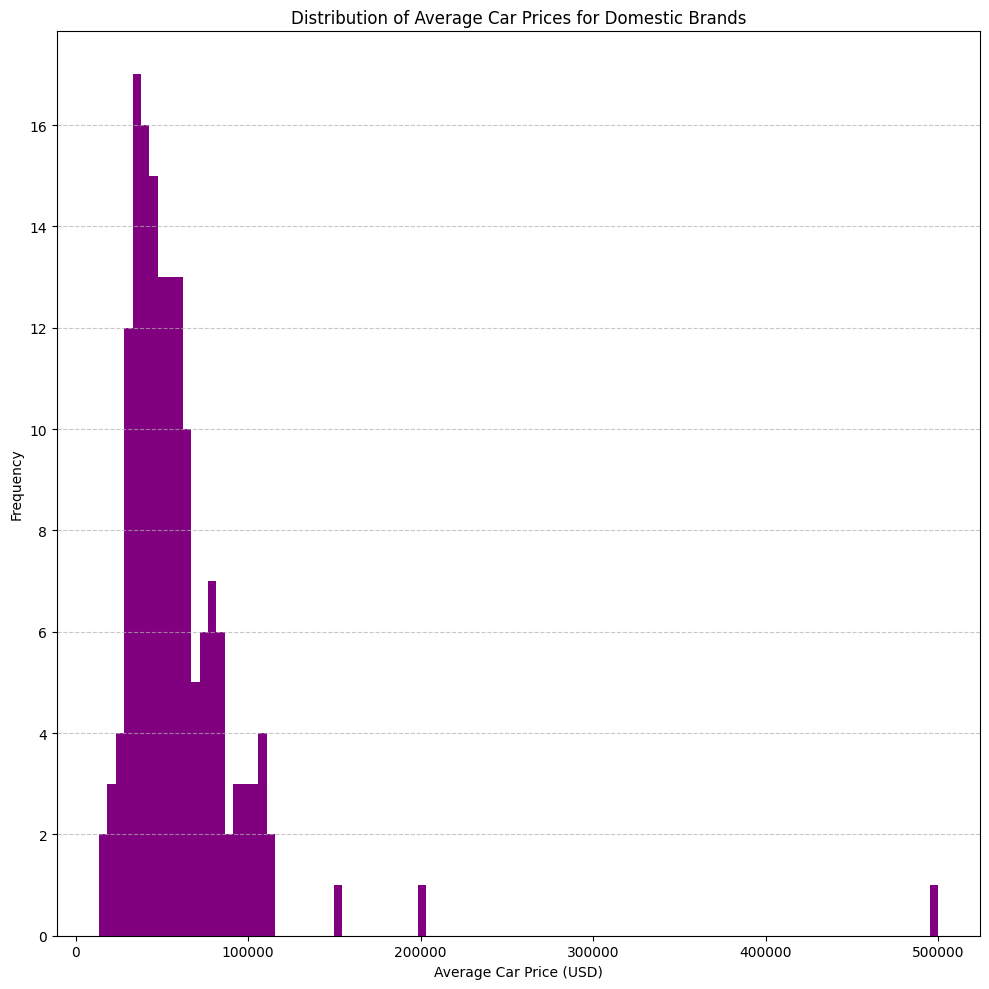

In [107]:
plt.figure(figsize=(10,10))
plt.hist(df_domestic_price['Average Car (DOM) Price'].dropna(), color = 'purple', bins = 100)
plt.title('Distribution of Average Car Prices for Domestic Brands')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Price for Domestic Vehicles:

In [189]:
df_domestic_price.describe()

,Average Car (DOM) Price
count,162.000000
mean,59952.253086
std,43450.776766
min,13500.000000
25%,38296.250000
50%,52000.000000
75%,70000.000000
max,500000.000000


#### Note: •Data isn't as skewed as the other categories, it actually is starting to look somewhat normal, but with a couple outliers in the distribution. We will now filter for the outliers by restricting the dataset to vehicles ≤$200,000

### Average Price for Domestic Vehicles ≤$200,000:

In [190]:
price_threshold = 200000

df_domestic_price_filter = df_domestic_price[df_domestic_price['Average Car (DOM) Price'] <= price_threshold].copy()

df_domestic_price_filter

,Company Names,Cars Names,Cars Prices,Average Car (DOM) Price
2,Ford,KA+,"$12,000-$15,000",13500.0
599,Cadillac,CT4,"$34,395",34395.0
600,Cadillac,CT4-V,"$46,595",46595.0
601,Cadillac,CT5,"$38,195",38195.0
602,Cadillac,CT5-V,"$50,995",50995.0
...,...,...,...,...
1062,Ford,Mustang (2024),"$60,000",60000.0
1063,Ford,Ranger (2024),"$40,000",40000.0
1064,Ford,Escape Plug-in Hybrid (2024),"$38,000",38000.0
1065,Ford,Bronco (2024),"$45,000",45000.0


### Distribution of Average Car Price for Domestice Brands ≤$200,000:

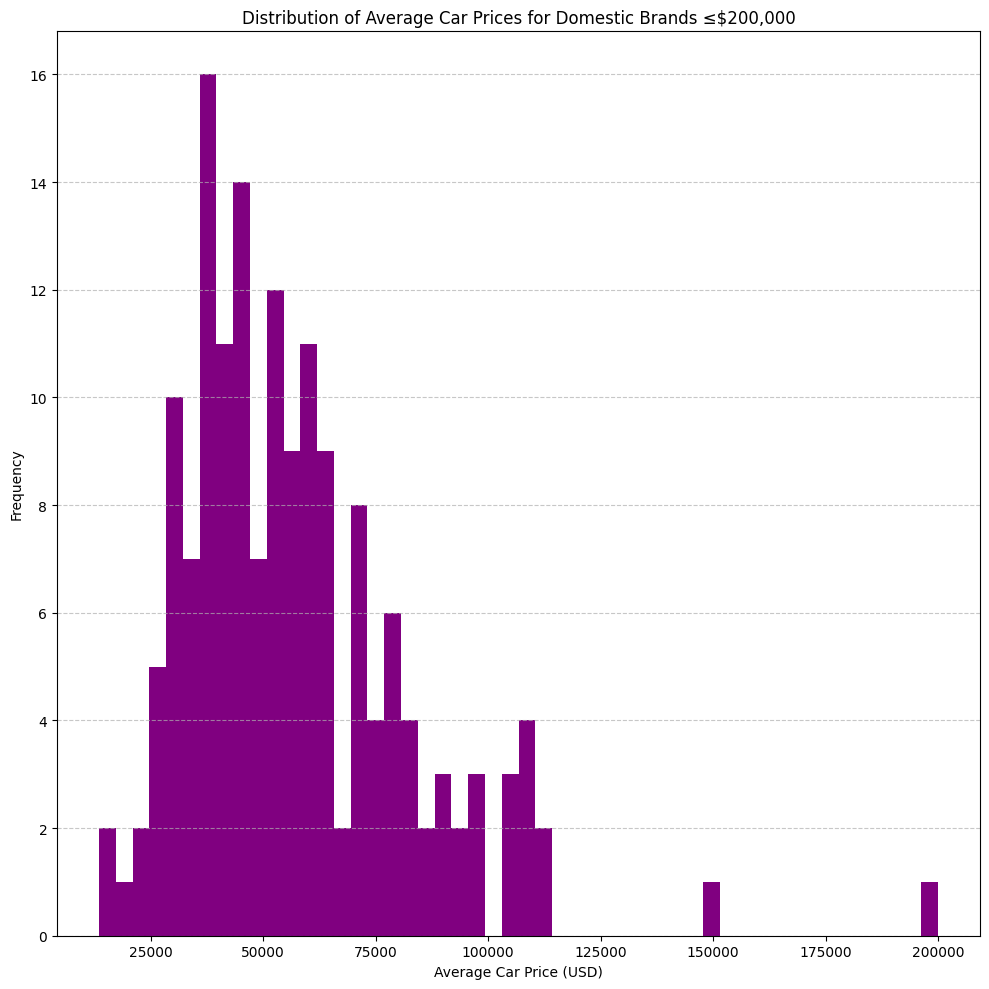

In [205]:
plt.figure(figsize=(10,10))
plt.hist(df_domestic_price_filter['Average Car (DOM) Price'].dropna(), color = 'purple', bins = 50)
plt.title('Distribution of Average Car Prices for Domestic Brands ≤$200,000')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Price for Domestic Vehicles ≤$200,000:

In [192]:
df_domestic_price_filter.describe()

,Average Car (DOM) Price
count,161.000000
mean,57219.037267
std,26114.938879
min,13500.000000
25%,38195.000000
50%,52000.000000
75%,70000.000000
max,200000.000000


In [41]:
df_imported = df[df['Company Names'].isin(['Toyota','Nissan','HONDA','HYUNDAI','BMW','Mercedes'])].copy()

df_imported_price = df_imported[['Company Names', 'Cars Names', 'Cars Prices']].copy()

df_imported_price

,Company Names,Cars Names,Cars Prices
5,BMW,Mclaren 720s,"$499,000"
99,BMW,M5 CS,"$142,000"
100,BMW,M4 GTS,"$133,000"
101,BMW,M3 COMPETITION,"$76,000"
102,BMW,M2 CS,"$83,000"
...,...,...,...
1213,Toyota,Crown Signia,"$43,590  $48,000"
1214,Toyota,4Runner (6th Gen),"$50,000"
1215,Toyota,Corolla Cross,"$25,210  $29,135"
1216,Toyota,C-HR+," 33,000"


## Imported:

In [406]:
df_imported

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
5,BMW,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,"$499,000",Petrol,2,770 Nm
99,BMW,M5 CS,V8,"4,395 cc",627 hp,305 km/h,3.0 sec,"$142,000",Petrol,5,750 Nm
100,BMW,M4 GTS,I6,"2,993 cc",493 hp,305 km/h,3.7 sec,"$133,000",Petrol,4,600 Nm
101,BMW,M3 COMPETITION,I6,"2,993 cc",503 hp,285 km/h,3.5 sec,"$76,000",Petrol,5,650 Nm
102,BMW,M2 CS,I6,"2,993 cc",444 hp,280 km/h,4.0 sec,"$83,000",Petrol,4,550 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


### Average Price for Imported Vehicles:

In [111]:
df_imported_price['Average Car (IMP) Price'] = df_imported_price['Cars Prices'].apply(clean_string_data)

df_imported_price

,Company Names,Cars Names,Cars Prices,Average Car (IMP) Price
5,BMW,Mclaren 720s,"$499,000",499000.0
99,BMW,M5 CS,"$142,000",142000.0
100,BMW,M4 GTS,"$133,000",133000.0
101,BMW,M3 COMPETITION,"$76,000",76000.0
102,BMW,M2 CS,"$83,000",83000.0
...,...,...,...,...
1213,Toyota,Crown Signia,"$43,590  $48,000",45795.0
1214,Toyota,4Runner (6th Gen),"$50,000",50000.0
1215,Toyota,Corolla Cross,"$25,210  $29,135",27172.5
1216,Toyota,C-HR+," 33,000",38610.0


In [152]:
df_imported_price.isnull().sum()

Company Names              0
Cars Names                 0
Cars Prices                0
Average Car (IMP) Price    0
dtype: int64

### Distribution of Average Prices for Imported Brands:

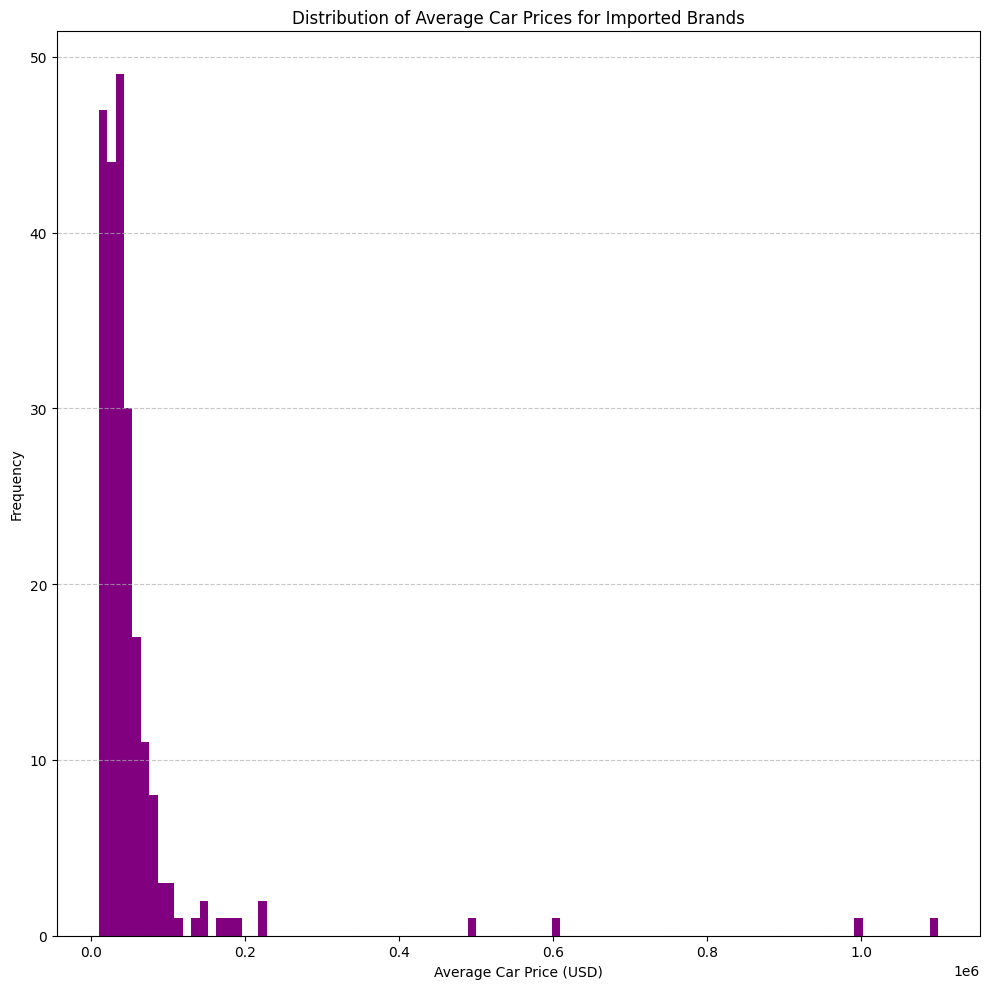

In [115]:
plt.figure(figsize=(10,10))
plt.hist(df_imported_price['Average Car (IMP) Price'].dropna(), color = 'purple',bins = 100)
plt.title('Distribution of Average Car Prices for Imported Brands')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Price for Imported Vehicles:

In [109]:
df_imported_price.describe()

,Average Car (IMP) Price
count,2.250000e+02
mean,5.734874e+04
std,1.106651e+05
min,1.000000e+04
25%,2.500000e+04
50%,3.700000e+04
75%,5.200000e+04
max,1.100000e+06


#### Note: •Data is looking a tiny bit normal but it's skewed to the right. We will filter the data set by restricting the car prices to be ≤$200,000

### Average Price for Imported Vehicles ≤$200,000:

In [193]:
price_threshold = 200000

df_imported_price_filter = df_imported_price[df_imported_price['Average Car (IMP) Price'] <= price_threshold].copy()

df_imported_price_filter

,Company Names,Cars Names,Cars Prices,Average Car (IMP) Price
99,BMW,M5 CS,"$142,000",142000.0
100,BMW,M4 GTS,"$133,000",133000.0
101,BMW,M3 COMPETITION,"$76,000",76000.0
102,BMW,M2 CS,"$83,000",83000.0
103,BMW,X5 M COMPETITION,"$114,000",114000.0
...,...,...,...,...
1213,Toyota,Crown Signia,"$43,590  $48,000",45795.0
1214,Toyota,4Runner (6th Gen),"$50,000",50000.0
1215,Toyota,Corolla Cross,"$25,210  $29,135",27172.5
1216,Toyota,C-HR+," 33,000",38610.0


### Distribution of Average Car Prices for Imported Vehicles ≤$200,000:

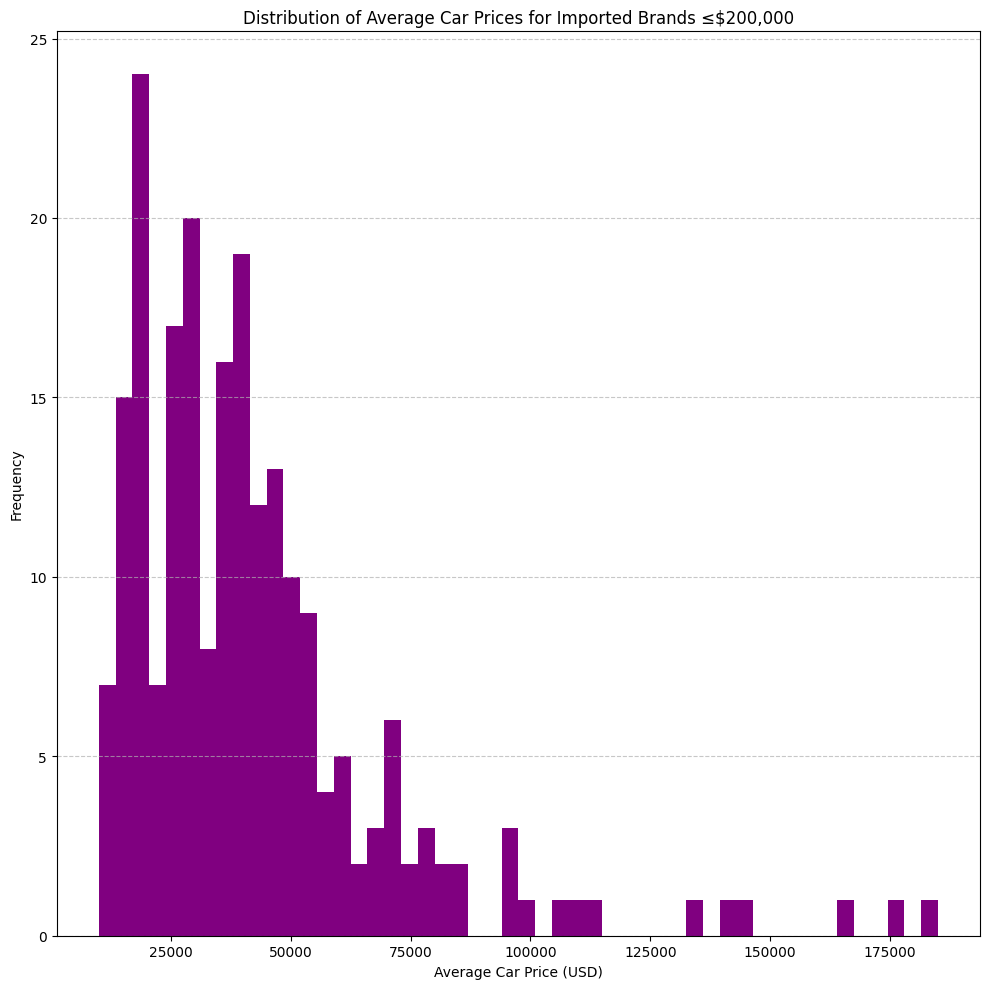

In [196]:
plt.figure(figsize=(10,10))
plt.hist(df_imported_price_filter['Average Car (IMP) Price'].dropna(), color = 'purple',bins = 50)
plt.title('Distribution of Average Car Prices for Imported Brands ≤$200,000')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Price for Imported Vehicles ≤$200,000:

In [367]:
df_imported_price_filter.describe()

,Average Car (IMP) Price
count,219.000000
mean,42303.500000
std,28377.699459
min,10000.000000
25%,24980.000000
50%,36000.000000
75%,50000.000000
max,185000.000000


## Domestic V.S. Imported:

### Average Domestic Price V.S. Average Imported Price (With Outliers):

#### Boxplot:

In [370]:
data_to_plot_DI = [df_domestic_price['Average Car (DOM) Price'].dropna(),
               df_imported_price['Average Car (IMP) Price'].dropna()]


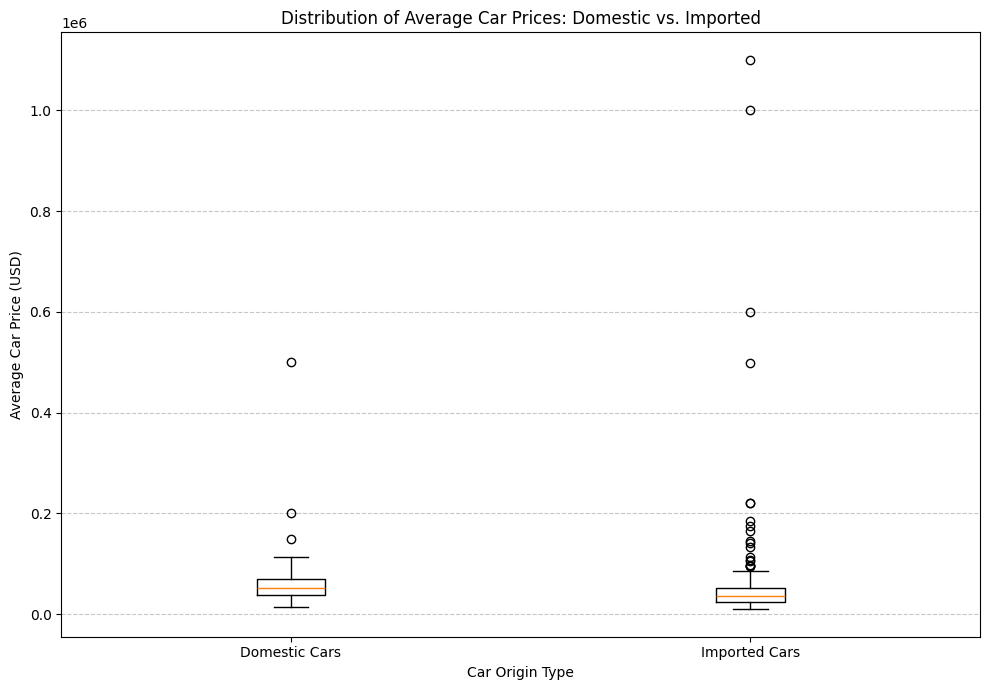

In [371]:
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot_DI,tick_labels=['Domestic Cars','Imported Cars'])
plt.title('Distribution of Average Car Prices: Domestic vs. Imported')
plt.xlabel('Car Origin Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Violin Plot:

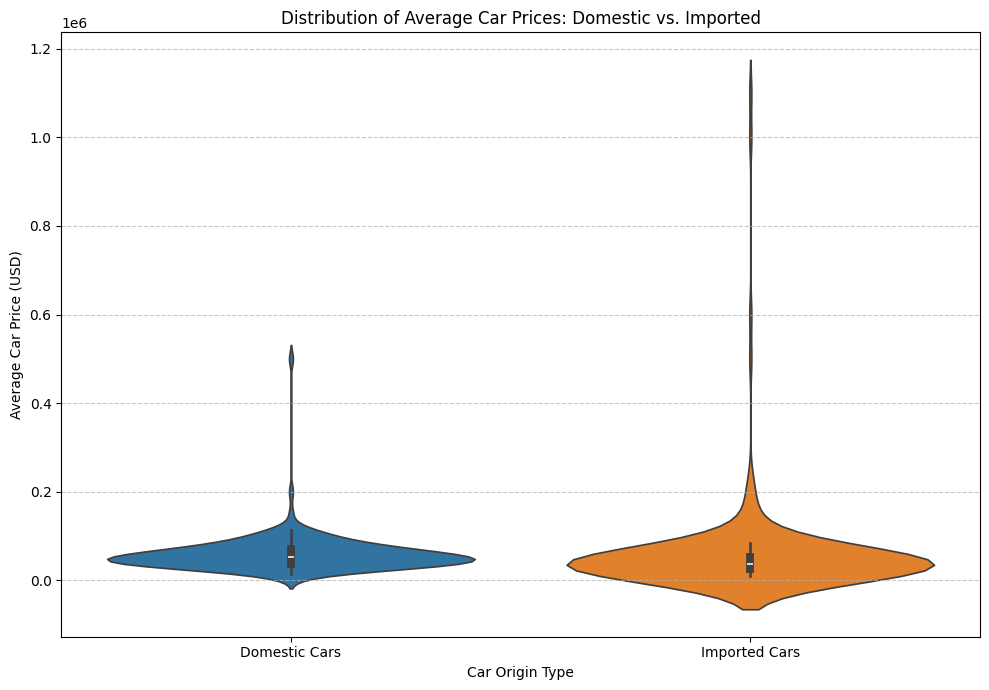

In [408]:
df_domestic_price.dropna(subset=['Average Car (DOM) Price'], inplace=True)
df_imported_price.dropna(subset=['Average Car (IMP) Price'], inplace=True)

df_domestic_price['Origin_category'] = 'Domestic Cars'
df_imported_price['Origin_category'] = 'Imported Cars'

df_domestic_for_plot = df_domestic_price[['Origin_category', 'Average Car (DOM) Price']].rename(columns={'Average Car (DOM) Price': 'Average Car Price'})
df_imported_for_plot = df_imported_price[['Origin_category', 'Average Car (IMP) Price']].rename(columns={'Average Car (IMP) Price': 'Average Car Price'})

data_to_plot_violin_DI = pd.concat([df_domestic_for_plot, df_imported_for_plot])

plt.figure(figsize=(10, 7))
sns.violinplot(x='Origin_category', y='Average Car Price', data=data_to_plot_violin_DI, hue = 'Origin_category', legend = False)

plt.title('Distribution of Average Car Prices: Domestic vs. Imported')
plt.xlabel('Car Origin Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Barchart Plot:

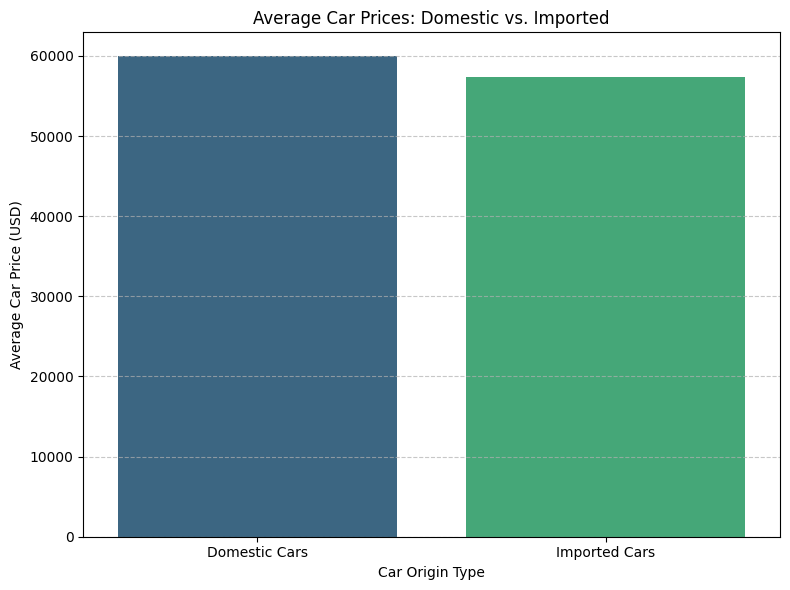

In [374]:
df_domestic_price.dropna(subset=['Average Car (DOM) Price'], inplace=True)
df_imported_price.dropna(subset=['Average Car (IMP) Price'], inplace=True)

df_domestic_price['Origin_category'] = 'Domestic Cars'
df_imported_price['Origin_category'] = 'Imported Cars'

df_domestic_for_plot = df_domestic_price[['Origin_category', 'Average Car (DOM) Price']].rename(columns={'Average Car (DOM) Price': 'Average Car Price'})
df_imported_for_plot = df_imported_price[['Origin_category', 'Average Car (IMP) Price']].rename(columns={'Average Car (IMP) Price': 'Average Car Price'})

data_to_plot_bar = pd.concat([df_domestic_for_plot, df_imported_for_plot])

average_prices = data_to_plot_bar.groupby('Origin_category')['Average Car Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Origin_category', y='Average Car Price', data=average_prices, hue='Origin_category', palette = 'viridis')

plt.title('Average Car Prices: Domestic vs. Imported')
plt.xlabel('Car Origin Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Average Domestic Price V.S. Average Imported Price (Without Outliers):

#### Boxplot:

In [375]:
data_to_plot_DI_f = [df_domestic_price_filter['Average Car (DOM) Price'].dropna(),
               df_imported_price_filter['Average Car (IMP) Price'].dropna()]


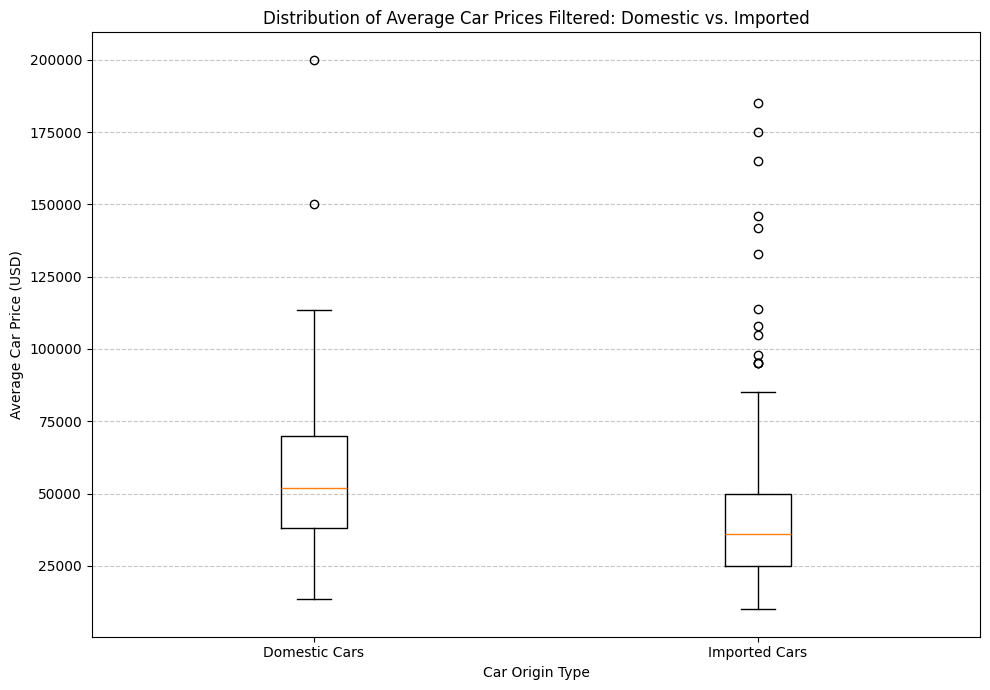

In [376]:
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot_DI_f,tick_labels=['Domestic Cars','Imported Cars'])
plt.title('Distribution of Average Car Prices Filtered: Domestic vs. Imported')
plt.xlabel('Car Origin Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Violin Plot:

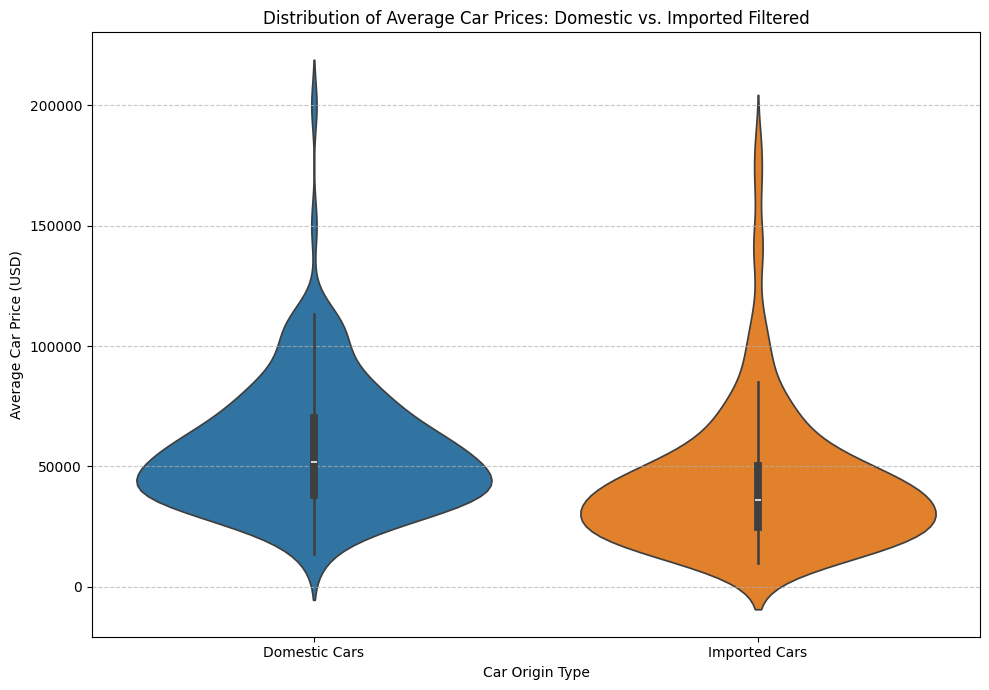

In [409]:
df_domestic_price_filter.dropna(subset=['Average Car (DOM) Price'], inplace=True)
df_imported_price_filter.dropna(subset=['Average Car (IMP) Price'], inplace=True)

df_domestic_price_filter['Origin_category'] = 'Domestic Cars'
df_imported_price_filter['Origin_category'] = 'Imported Cars'

df_domestic_for_plot = df_domestic_price_filter[['Origin_category', 'Average Car (DOM) Price']].rename(columns={'Average Car (DOM) Price': 'Average Car Price'})
df_imported_for_plot = df_imported_price_filter[['Origin_category', 'Average Car (IMP) Price']].rename(columns={'Average Car (IMP) Price': 'Average Car Price'})

data_to_plot_violin_DI_F = pd.concat([df_domestic_for_plot, df_imported_for_plot])

plt.figure(figsize=(10, 7))
sns.violinplot(x='Origin_category', y='Average Car Price', data=data_to_plot_violin_DI_F, hue = 'Origin_category', legend = False)

plt.title('Distribution of Average Car Prices: Domestic vs. Imported Filtered')
plt.xlabel('Car Origin Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Barchart Plot:

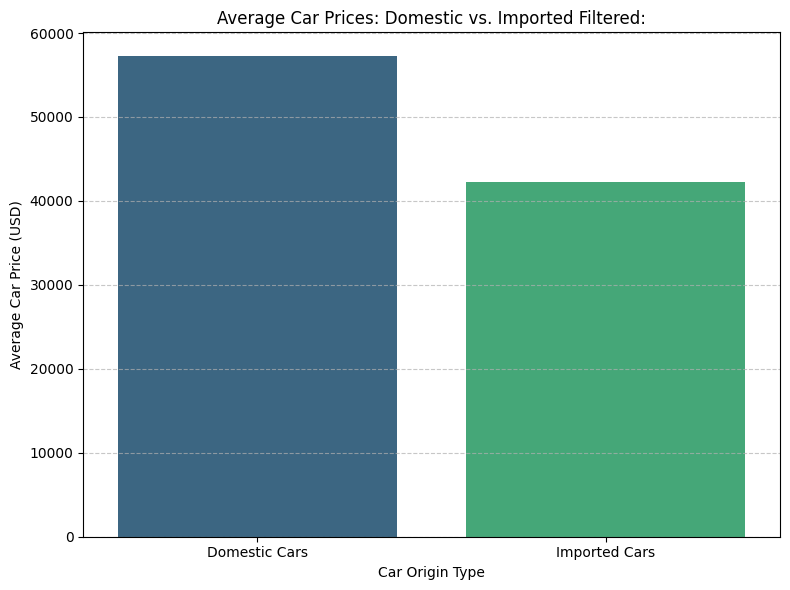

In [378]:
df_domestic_price_filter.dropna(subset=['Average Car (DOM) Price'], inplace=True)
df_imported_price_filter.dropna(subset=['Average Car (IMP) Price'], inplace=True)

df_domestic_price_filter['Origin_category'] = 'Domestic Cars'
df_imported_price_filter['Origin_category'] = 'Imported Cars'

df_domestic_for_plot = df_domestic_price_filter[['Origin_category', 'Average Car (DOM) Price']].rename(columns={'Average Car (DOM) Price': 'Average Car Price'})
df_imported_for_plot = df_imported_price_filter[['Origin_category', 'Average Car (IMP) Price']].rename(columns={'Average Car (IMP) Price': 'Average Car Price'})

data_to_plot_bar = pd.concat([df_domestic_for_plot, df_imported_for_plot])

average_prices = data_to_plot_bar.groupby('Origin_category')['Average Car Price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Origin_category', y='Average Car Price', data=average_prices, hue='Origin_category', palette = 'viridis')

plt.title('Average Car Prices: Domestic vs. Imported Filtered:')
plt.xlabel('Car Origin Type')
plt.ylabel('Average Car Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## V8 Engines:

In [202]:
df_V8 = df[df['Engines'].isin(['V8'])].copy()

df_V8_price = df_V8[['Company Names', 'Cars Names', 'Cars Prices']].copy()

df_V8_price

,Company Names,Cars Names,Cars Prices
0,FERRARI,SF90 STRADALE,"$1,100,000"
3,MERCEDES,GT 63 S,"$161,000"
5,BMW,Mclaren 720s,"$499,000"
6,ASTON MARTIN,VANTAGE F1,"$193,440"
7,BENTLEY,Continental GT Azure,"$311,000"
9,FERRARI,F8 TRIBUTO,"$280,000"
11,FERRARI,PORTOFINO,"$210,000"
12,FERRARI,ROMA,"$230,000"
14,FERRARI,F8 SPIDER,"$280,000"
15,FERRARI,PORTOFINO M,"$220,000"


### Average Price for V8 Vehicles:

In [203]:
df_V8_price['Average Car (V8) Price'] = df_V8_price['Cars Prices'].apply(clean_string_data)

df_V8_price

,Company Names,Cars Names,Cars Prices,Average Car (V8) Price
0,FERRARI,SF90 STRADALE,"$1,100,000",1100000.0
3,MERCEDES,GT 63 S,"$161,000",161000.0
5,BMW,Mclaren 720s,"$499,000",499000.0
6,ASTON MARTIN,VANTAGE F1,"$193,440",193440.0
7,BENTLEY,Continental GT Azure,"$311,000",311000.0
9,FERRARI,F8 TRIBUTO,"$280,000",280000.0
11,FERRARI,PORTOFINO,"$210,000",210000.0
12,FERRARI,ROMA,"$230,000",230000.0
14,FERRARI,F8 SPIDER,"$280,000",280000.0
15,FERRARI,PORTOFINO M,"$220,000",220000.0


### Distribution of Average Car Price for V8 Vehicles:

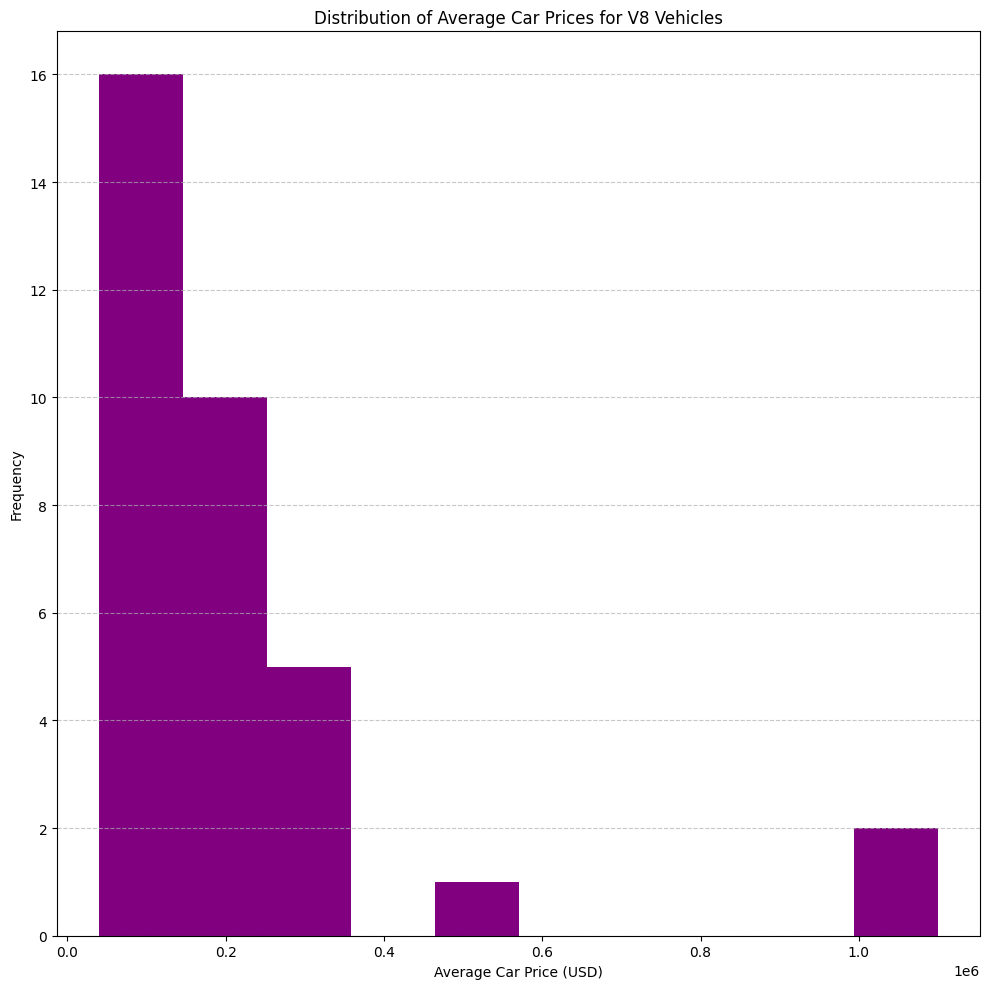

In [218]:
plt.figure(figsize=(10,10))
plt.hist(df_V8_price['Average Car (V8) Price'].dropna(), color = 'purple')
plt.title('Distribution of Average Car Prices for V8 Vehicles')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Prices for V8 Vehicles:

In [207]:
df_V8_price.describe()

,Average Car (V8) Price
count,3.400000e+01
mean,2.258924e+05
std,2.407410e+05
min,3.990000e+04
25%,1.082500e+05
50%,1.535000e+05
75%,2.415000e+05
max,1.100000e+06


#### Note: •Our data seems to have some outliers that are on the expensive side. We will filter the data by constraining the average price of V8's to be ≤$150,000.

### Average Price for V8 Vehicles ≤$150,000:

In [221]:
price_threshold = 150000

df_V8_price_filter = df_V8_price[df_V8_price['Average Car (V8) Price'] <= price_threshold].copy()

df_V8_price_filter

,Company Names,Cars Names,Cars Prices,Average Car (V8) Price
20,TOYOTA,TOYOTA LAND CRUISER,"$85,000",85000.0
21,TOYOTA,TOYOTA SEQUOIA,"$50,000",50000.0
31,NISSAN,TITAN,"$40,000",40000.0
36,ASTON MARTIN,VANTAGE,"$142,000",142000.0
79,MERCEDES,BENZ S-CLASS S 580,"$116,000",116000.0
80,MERCEDES,BENZ E-CLASS E 63 S,"$104,000",104000.0
82,MERCEDES,BENZ GLE 63 S,"$113,000",113000.0
99,BMW,M5 CS,"$142,000",142000.0
103,BMW,X5 M COMPETITION,"$114,000",114000.0
105,BMW,M8 GRAN COUPE,"$146,000",146000.0


### Distribution of Average Car Prices for V8 Vehicles ≥$150,000:

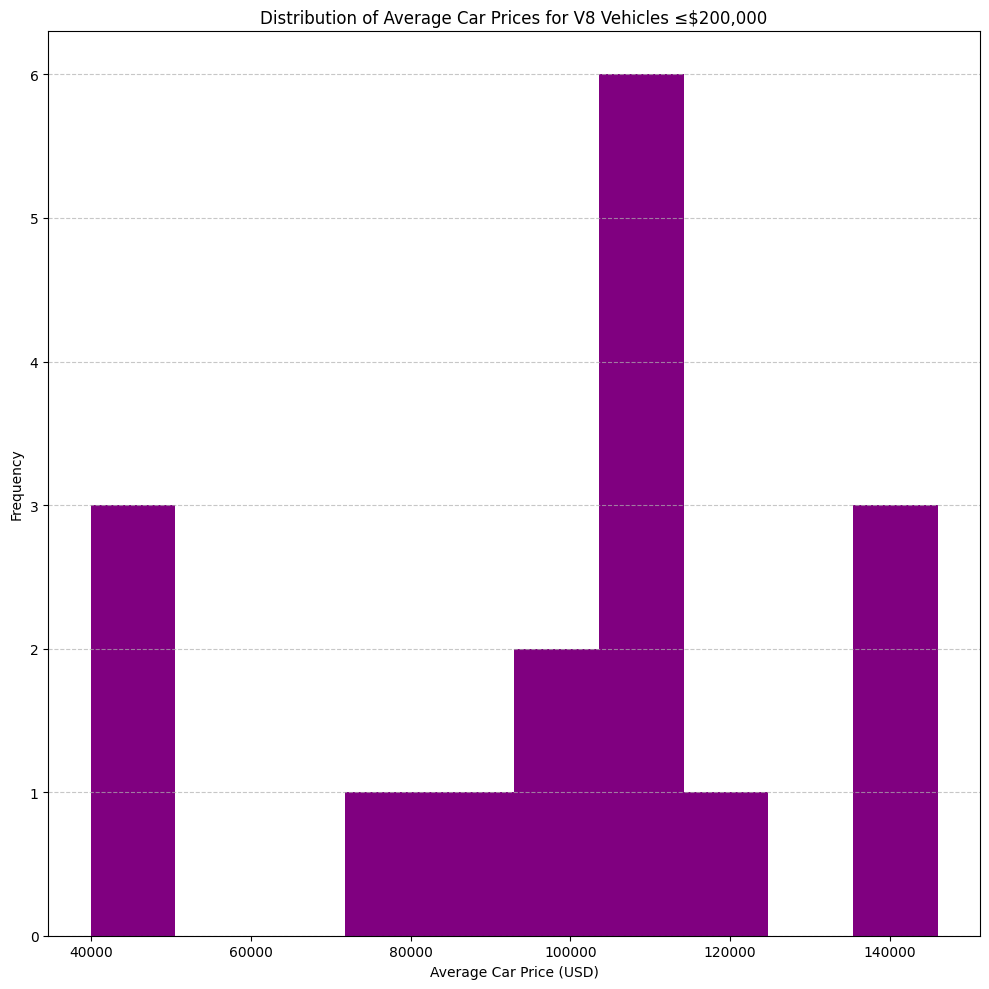

In [222]:
plt.figure(figsize=(10,10))
plt.hist(df_V8_price_filter['Average Car (V8) Price'].dropna(), color = 'purple')
plt.title('Distribution of Average Car Prices for V8 Vehicles ≤$200,000')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Prices for V8 Vehicles ≤$150,000:

In [311]:
df_V8_price_filter.describe()

,Average Car (V8) Price
count,17.000000
mean,99876.470588
std,32653.245042
min,39900.000000
25%,85000.000000
50%,108000.000000
75%,114000.000000
max,146000.000000


### Expensive V8's:

In [340]:
df_V8_price['Price Category'] = df_V8_price['Average Car (V8) Price'].apply(expensive_engines)

df_V8_price

,Company Names,Cars Names,Cars Prices,Average Car (V8) Price,Price Category
0,FERRARI,SF90 STRADALE,"$1,100,000",1100000.0,Expensive
3,MERCEDES,GT 63 S,"$161,000",161000.0,Expensive
5,BMW,Mclaren 720s,"$499,000",499000.0,Expensive
6,ASTON MARTIN,VANTAGE F1,"$193,440",193440.0,Expensive
7,BENTLEY,Continental GT Azure,"$311,000",311000.0,Expensive
9,FERRARI,F8 TRIBUTO,"$280,000",280000.0,Expensive
11,FERRARI,PORTOFINO,"$210,000",210000.0,Expensive
12,FERRARI,ROMA,"$230,000",230000.0,Expensive
14,FERRARI,F8 SPIDER,"$280,000",280000.0,Expensive
15,FERRARI,PORTOFINO M,"$220,000",220000.0,Expensive


### Statistics for Expensive V8's:

In [324]:
df_V8_price['Price Category'].value_counts(normalize = True)

Price Category
Expensive        0.911765
Not Expensive    0.088235
Name: proportion, dtype: float64

In [329]:
proportion_data = df_V8_price['Price Category'].value_counts(normalize=True) * 100
proportion_data

Price Category
Expensive        91.176471
Not Expensive     8.823529
Name: proportion, dtype: float64

In [331]:
df_V8_price['Price Category'].describe()

count            34
unique            2
top       Expensive
freq             31
Name: Price Category, dtype: object

### Expensive V8's Pie Chart:

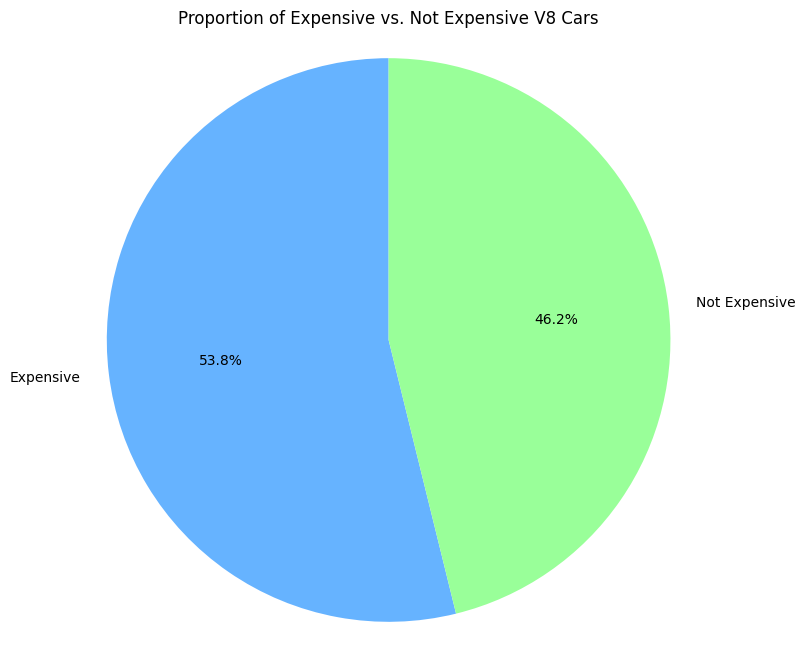

In [342]:
plt.figure(figsize=(8, 8))
plt.pie(proportion_data, labels=proportion_data.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proportion of Expensive vs. Not Expensive V8 Cars')
plt.axis('equal')
plt.show()

### Expensive V8's Filtered:

In [343]:
df_V8_price_filter['Price Category'] = df_V8_price_filter['Average Car (V8) Price'].apply(expensive_engines)

df_V8_price_filter

,Company Names,Cars Names,Cars Prices,Average Car (V8) Price,Price Category
20,TOYOTA,TOYOTA LAND CRUISER,"$85,000",85000.0,Expensive
21,TOYOTA,TOYOTA SEQUOIA,"$50,000",50000.0,Not Expensive
31,NISSAN,TITAN,"$40,000",40000.0,Not Expensive
36,ASTON MARTIN,VANTAGE,"$142,000",142000.0,Expensive
79,MERCEDES,BENZ S-CLASS S 580,"$116,000",116000.0,Expensive
80,MERCEDES,BENZ E-CLASS E 63 S,"$104,000",104000.0,Expensive
82,MERCEDES,BENZ GLE 63 S,"$113,000",113000.0,Expensive
99,BMW,M5 CS,"$142,000",142000.0,Expensive
103,BMW,X5 M COMPETITION,"$114,000",114000.0,Expensive
105,BMW,M8 GRAN COUPE,"$146,000",146000.0,Expensive


### Statistics for Expensive V8's Filtered:

In [344]:
df_V8_price_filter['Price Category'].value_counts(normalize = True)

Price Category
Expensive        0.823529
Not Expensive    0.176471
Name: proportion, dtype: float64

In [349]:
proportion_data_filter = df_V8_price_filter['Price Category'].value_counts(normalize=True) * 100
proportion_data_filter

Price Category
Expensive        82.352941
Not Expensive    17.647059
Name: proportion, dtype: float64

In [352]:
df_V8_price_filter['Price Category'].describe()

count            17
unique            2
top       Expensive
freq             14
Name: Price Category, dtype: object

### Expensive V8's Filtered Pie Chart:

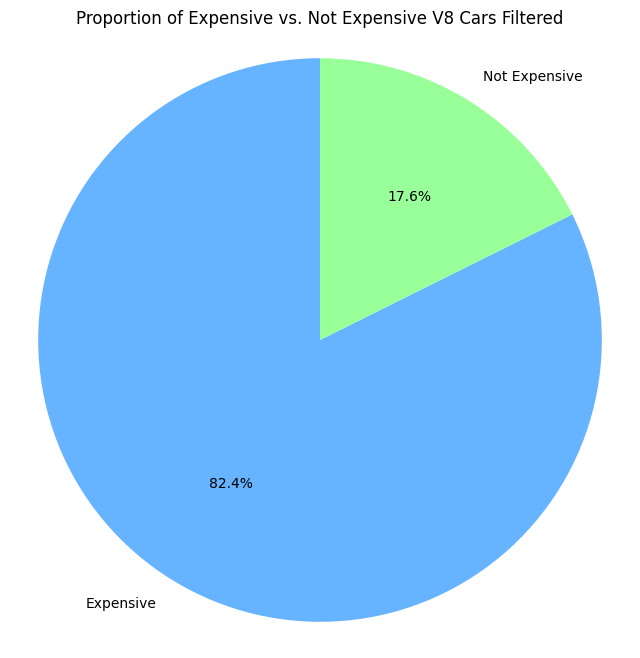

In [351]:
plt.figure(figsize=(8, 8))
plt.pie(proportion_data_filter, labels=proportion_data.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proportion of Expensive vs. Not Expensive V8 Cars Filtered')
plt.axis('equal')
plt.show()

## V6 Engines:

In [224]:
df_V6 = df[df['Engines'].isin(['V6'])].copy()

df_V6_price = df_V6[['Company Names', 'Cars Names', 'Cars Prices']].copy()

df_V6_price

,Company Names,Cars Names,Cars Prices
22,NISSAN,GT-R,"$113,000"
23,NISSAN,370Z,"$30,000"
24,NISSAN,Z PROTO,"$40,000"
26,NISSAN,MAXIMA,"$35,000"
29,NISSAN,PATHFINDER,"$35,000"
30,NISSAN,FRONTIER,"$30,000"
83,MERCEDES,BENZ S-CLASS S 500,"$109,000"
84,MERCEDES,BENZ E-CLASS E 450,"$62,000"
85,MERCEDES,BENZ CLS 450,"$70,000"
86,MERCEDES,BENZ GT 53,"$99,000"


### Average Price for V6 Vehicles:

In [225]:
df_V6_price['Average Car (V6) Price'] = df_V6_price['Cars Prices'].apply(clean_string_data)

df_V6_price

,Company Names,Cars Names,Cars Prices,Average Car (V6) Price
22,NISSAN,GT-R,"$113,000",113000.0
23,NISSAN,370Z,"$30,000",30000.0
24,NISSAN,Z PROTO,"$40,000",40000.0
26,NISSAN,MAXIMA,"$35,000",35000.0
29,NISSAN,PATHFINDER,"$35,000",35000.0
30,NISSAN,FRONTIER,"$30,000",30000.0
83,MERCEDES,BENZ S-CLASS S 500,"$109,000",109000.0
84,MERCEDES,BENZ E-CLASS E 450,"$62,000",62000.0
85,MERCEDES,BENZ CLS 450,"$70,000",70000.0
86,MERCEDES,BENZ GT 53,"$99,000",99000.0


### Distribution of Average Car Price for V6 Vehicles:

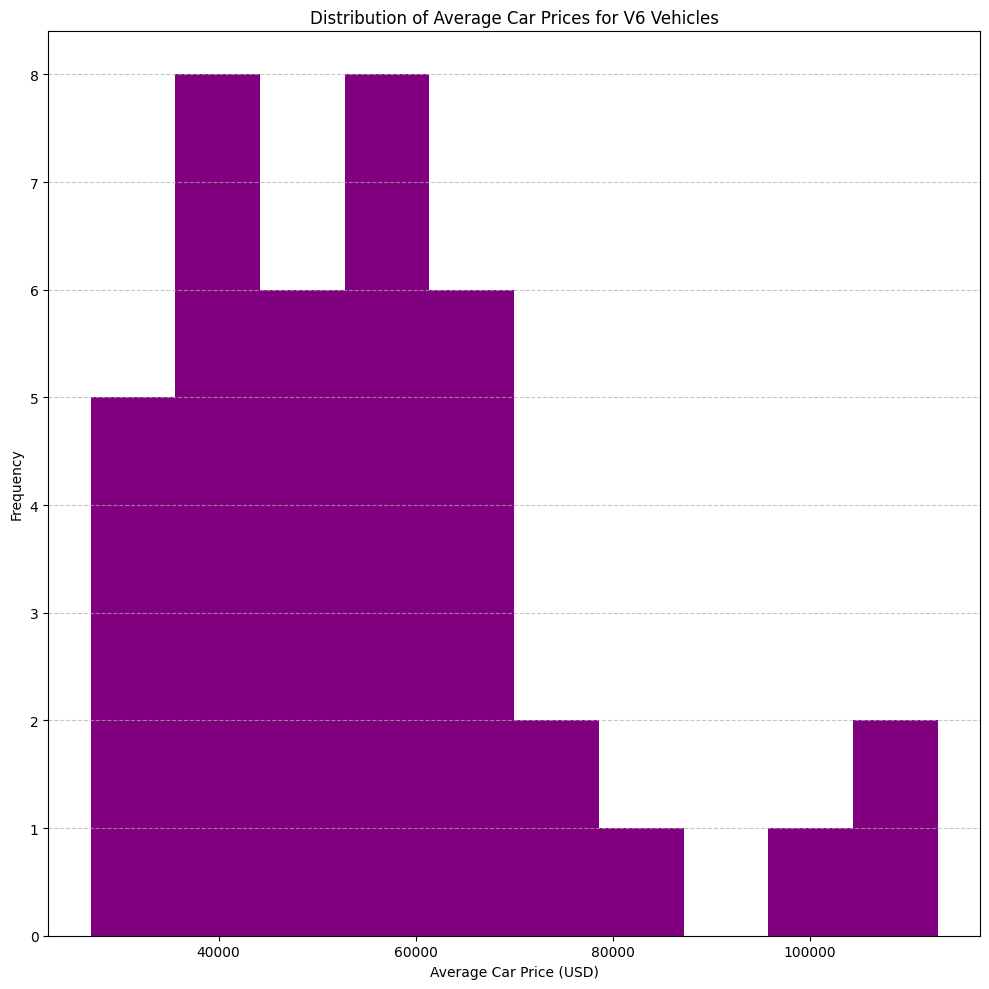

In [226]:
plt.figure(figsize=(10,10))
plt.hist(df_V6_price['Average Car (V6) Price'].dropna(), color = 'purple')
plt.title('Distribution of Average Car Prices for V6 Vehicles')
plt.xlabel('Average Car Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Statistics for Average Car Prices for V6 Vehicles:

In [227]:
df_V6_price.describe()

,Average Car (V6) Price
count,39.000000
mean,55578.205128
std,19806.328052
min,27000.000000
25%,40900.000000
50%,54000.000000
75%,62000.000000
max,113000.000000


### Expensive V6's:

In [341]:
df_V6_price['Price Category'] = df_V6_price['Average Car (V6) Price'].apply(expensive_engines)

df_V6_price

,Company Names,Cars Names,Cars Prices,Average Car (V6) Price,Price Category
22,NISSAN,GT-R,"$113,000",113000.0,Expensive
23,NISSAN,370Z,"$30,000",30000.0,Not Expensive
24,NISSAN,Z PROTO,"$40,000",40000.0,Not Expensive
26,NISSAN,MAXIMA,"$35,000",35000.0,Not Expensive
29,NISSAN,PATHFINDER,"$35,000",35000.0,Not Expensive
30,NISSAN,FRONTIER,"$30,000",30000.0,Not Expensive
83,MERCEDES,BENZ S-CLASS S 500,"$109,000",109000.0,Expensive
84,MERCEDES,BENZ E-CLASS E 450,"$62,000",62000.0,Expensive
85,MERCEDES,BENZ CLS 450,"$70,000",70000.0,Expensive
86,MERCEDES,BENZ GT 53,"$99,000",99000.0,Expensive


### Statistics for Expensive V6's:

In [335]:
df_V6_price['Price Category'].value_counts(normalize = True)

Price Category
Expensive        0.538462
Not Expensive    0.461538
Name: proportion, dtype: float64

In [338]:
proportion_data_V6 = df_V6_price['Price Category'].value_counts(normalize=True) * 100
proportion_data_V6

Price Category
Expensive        53.846154
Not Expensive    46.153846
Name: proportion, dtype: float64

In [337]:
df_V6_price['Price Category'].describe()

count            39
unique            2
top       Expensive
freq             21
Name: Price Category, dtype: object

### Expensive V6's Pie Chart:

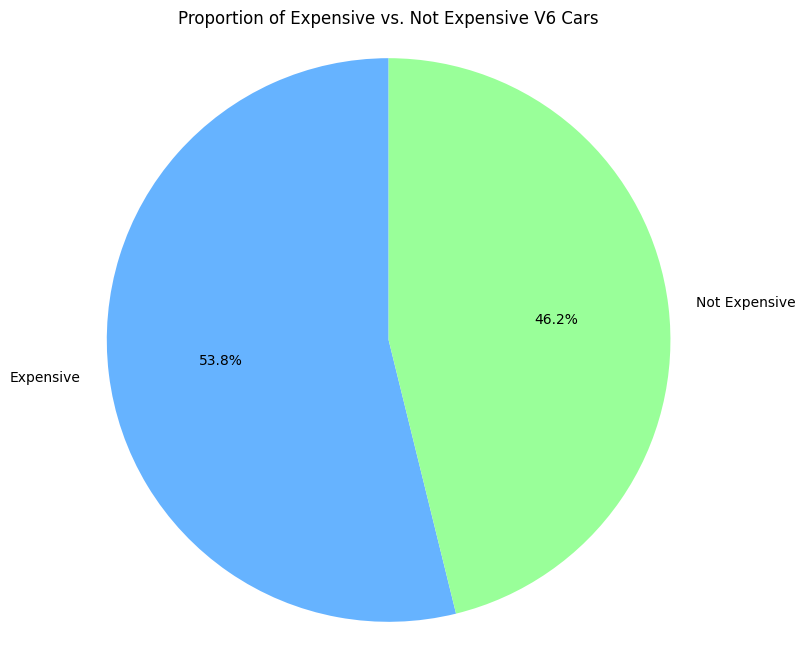

In [353]:
plt.figure(figsize=(8, 8))
plt.pie(proportion_data_V6, labels=proportion_data.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proportion of Expensive vs. Not Expensive V6 Cars')
plt.axis('equal') 
plt.show()

## V8 Engines V.S. V6 Engines:

### Proportion of Expensive V8 Cars V.S. Proportion of Expensive V6 Cars:

In [397]:
df_engines = df[df['Engines'].isin(['V8','V6'])].copy()

df_engines_price = df_engines[['Company Names','Engines','Cars Names', 'Cars Prices']].copy()

df_engines_price

,Company Names,Engines,Cars Names,Cars Prices
0,FERRARI,V8,SF90 STRADALE,"$1,100,000"
3,MERCEDES,V8,GT 63 S,"$161,000"
5,BMW,V8,Mclaren 720s,"$499,000"
6,ASTON MARTIN,V8,VANTAGE F1,"$193,440"
7,BENTLEY,V8,Continental GT Azure,"$311,000"
...,...,...,...,...
948,Acura,V6,TLX A-Spec Sedan,"$50,000"
955,Acura,V6,TLX 3.5L V6,"$50,000"
957,Acura,V6,MDX SH-AWD w/Technology Package,"$55,000"
959,Acura,V6,MDX Elite,"$58,000"


In [398]:
df_engines_price['Average Car Price'] = df_engines_price['Cars Prices'].apply(clean_string_data)

df_engines_price

,Company Names,Engines,Cars Names,Cars Prices,Average Car Price
0,FERRARI,V8,SF90 STRADALE,"$1,100,000",1100000.0
3,MERCEDES,V8,GT 63 S,"$161,000",161000.0
5,BMW,V8,Mclaren 720s,"$499,000",499000.0
6,ASTON MARTIN,V8,VANTAGE F1,"$193,440",193440.0
7,BENTLEY,V8,Continental GT Azure,"$311,000",311000.0
...,...,...,...,...,...
948,Acura,V6,TLX A-Spec Sedan,"$50,000",50000.0
955,Acura,V6,TLX 3.5L V6,"$50,000",50000.0
957,Acura,V6,MDX SH-AWD w/Technology Package,"$55,000",55000.0
959,Acura,V6,MDX Elite,"$58,000",58000.0


In [399]:
df_engines_price['Price Category'] = df_engines_price['Average Car Price'].apply(expensive_engines)

df_engines_price

,Company Names,Engines,Cars Names,Cars Prices,Average Car Price,Price Category
0,FERRARI,V8,SF90 STRADALE,"$1,100,000",1100000.0,Expensive
3,MERCEDES,V8,GT 63 S,"$161,000",161000.0,Expensive
5,BMW,V8,Mclaren 720s,"$499,000",499000.0,Expensive
6,ASTON MARTIN,V8,VANTAGE F1,"$193,440",193440.0,Expensive
7,BENTLEY,V8,Continental GT Azure,"$311,000",311000.0,Expensive
...,...,...,...,...,...,...
948,Acura,V6,TLX A-Spec Sedan,"$50,000",50000.0,Not Expensive
955,Acura,V6,TLX 3.5L V6,"$50,000",50000.0,Not Expensive
957,Acura,V6,MDX SH-AWD w/Technology Package,"$55,000",55000.0,Expensive
959,Acura,V6,MDX Elite,"$58,000",58000.0,Expensive


#### Barchart Plot:

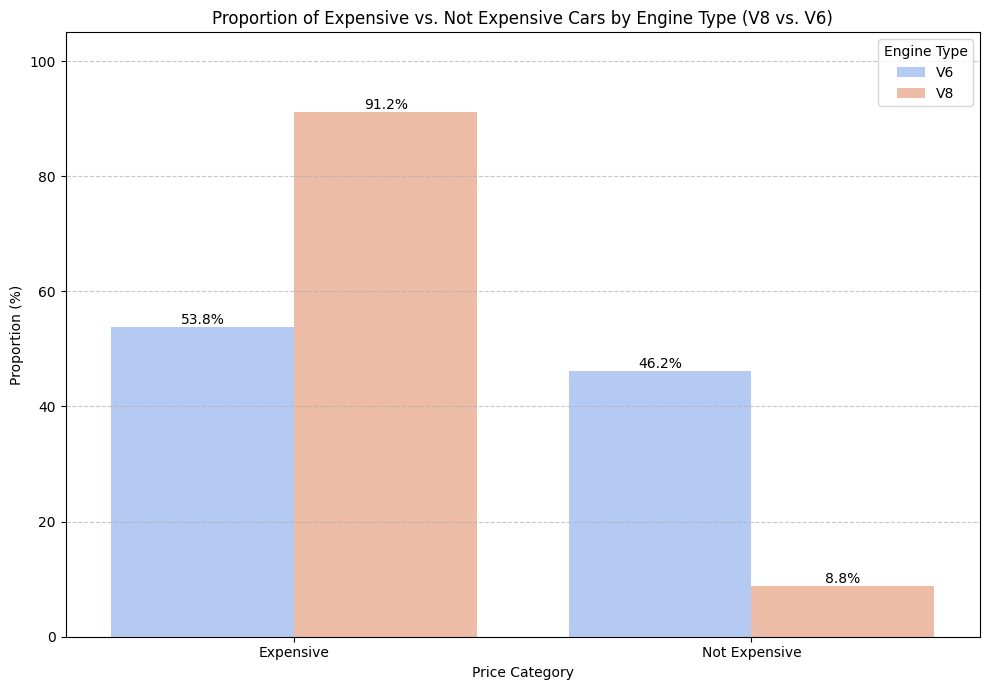

In [400]:
proportions = df_engines_price.groupby(['Engines', 'Price Category']).size().reset_index(name='Count')

proportions['Proportion'] = proportions.groupby('Engines')['Count'].transform(lambda x: x / x.sum()) * 100

plt.figure(figsize=(10, 7))
sns.barplot(x='Price Category', y='Proportion', hue='Engines', data=proportions, palette='coolwarm')
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title('Proportion of Expensive vs. Not Expensive Cars by Engine Type (V8 vs. V6)')
plt.xlabel('Price Category')
plt.ylabel('Proportion (%)')
plt.ylim(0, 105) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

# Test Functions:

In [11]:
df_cars = df[df['Company Names'] == 'Ford'].copy()

df_cars_prices = df_cars[['Company Names', 'Cars Prices']].copy()

df_cars_prices.head()


,Company Names,Cars Prices
2,Ford,"$12,000-$15,000"
1014,Ford,"$25,000 - $40,000"
1015,Ford,"$30,000 - $45,000"
1016,Ford,"$15,000 - $25,000"
1017,Ford,"$20,000 - $30,000"


In [13]:
df_cars_prices['Average Car Price'] = df_cars_prices['Cars Prices'].apply(clean_string_data)

df_cars_prices

,Company Names,Cars Prices,Average Car Price
2,Ford,"$12,000-$15,000",13500.0
1014,Ford,"$25,000 - $40,000",32500.0
1015,Ford,"$30,000 - $45,000",37500.0
1016,Ford,"$15,000 - $25,000",20000.0
1017,Ford,"$20,000 - $30,000",25000.0
1018,Ford,"$12,000 - $15,000",13500.0
1019,Ford,"$20,000 - $25,000",22500.0
1020,Ford,"$25,000 - $38,000",31500.0
1021,Ford,"$35,000 - $45,000",40000.0
1022,Ford,"$35,000 - $55,000",45000.0


In [14]:
df_cars_prices['Average Car Price'].describe()

count        54.000000
mean      53457.685185
std       64226.996695
min       13500.000000
25%       32000.000000
50%       44227.500000
75%       58481.250000
max      500000.000000
Name: Average Car Price, dtype: float64

In [307]:
def clean_string_data(price_str):

    if pd.isna(price_str):
        return np.nan

    is_euro = '€' in str(price_str) or '\x80' in str(price_str)

    price_str = str(price_str).strip()

    clean_price_str = price_str.replace('$','').replace(',','').replace('€','').replace('\x80','').replace('\x96','-').strip()

    parts = []
    if '-' in clean_price_str:
        parts = clean_price_str.split('-')
    elif '–' in clean_price_str:
        parts = clean_price_str.split('–')
    else:
        parts = [clean_price_str]

    numbers = []
    for i in parts:
        try:
            numbers.append(float(i.strip()))
        except ValueError:
            continue
            
    final_price = np.nan
    if len(numbers) == 2:
        final_price =(numbers[0]+numbers[1])/2
    elif len(numbers) == 1:
        final_price = numbers[0]

    if is_euro and not pd.isna(final_price):
        final_price *= 1.17 

    return final_price

In [317]:
def expensive_engines(price_float):
    if price_float >50000:
        return 'Expensive'
    else:
        return 'Not Expensive'
        

In [289]:
def clean_string_data_2(torque_string):
    if pd.isna(torque_string):
        return np.nan

    torque_string = str(torque_string).strip()

    clean_torque_str = torque_string.replace('Nm','').replace('\x80','').replace('\x96','-').strip()

    parts = []
    if '-' in clean_torque_str:
        parts = clean_torque_str.split('-')
    elif '–' in clean_torque_str:
        parts = clean_torque_str.split('–')
    else:
        parts = [clean_torque_str]

    numbers = []
    for i in parts:
        try:
            numbers.append(float(i.strip()))
        except ValueError:
            continue
            
    final_torque = np.nan
    if len(numbers) == 2:
        final_torque =(numbers[0]+numbers[1])/2
    elif len(numbers) == 1:
        final_torque = numbers[0]
    return final_torque

In [199]:
df['Fuel Types'].value_counts()

Fuel Types
Petrol                     871
Diesel                     106
Electric                    97
Hybrid                      79
Petrol/Diesel               16
Petrol/Hybrid               16
Plug-in Hybrid               5
Hybrid (Petrol)              4
Diesel/Petrol                4
Petrol, Diesel               3
Hydrogen                     3
Petrol, Hybrid               2
Petrol/AWD                   2
plug in hyrbrid              1
Hybrid/Electric              1
Petrol/EV                    1
CNG/Petrol                   1
Hybrid/Petrol                1
Diesel Hybrid                1
Petrol (Hybrid)              1
Hybrid (Gas + Electric)      1
Gas / Hybrid                 1
Hybrid / Plug-in             1
Name: count, dtype: int64

In [201]:
df['Engines'].value_counts()

Engines
I4                                    64
V12                                   51
V6                                    39
Inline-4                              38
V8                                    34
                                      ..
1.5L,HYBRID                            1
2.4L Turbo I4 (i-FORCE MAX Hybrid)     1
2.0L Gas / 2.0L Hybrid                 1
1.8L / 2.0L Hybrid                     1
2.5L Hybrid / Plug-in Hybrid           1
Name: count, Length: 356, dtype: int64

In [ ]:
#Electric,Hybrid,Petrol/Hybrid,Plug-in Hybrid,Hybrid (Petrol),Petrol, Hybrid,
#plug in hyrbrid,Hybrid/Electric ,Petrol/EV,Hybrid/Petrol,Diesel Hybrid,Petrol (Hybrid)
#Hybrid (Gas + Electric),Gas / Hybrid,Hybrid / Plug-in 